# Node embedding by DeepWalk

In [5]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
#%matplotlib inline

import pickle

operation = pd.read_csv('./df_pipe.csv', header=0, index_col=0, sep=';').dropna().reset_index(drop=True)
df_sentences = pd.read_csv('./df_flow.csv', header=0, index_col=0)

In [6]:
print(len(operation))
print(len(df_sentences))

27
400


In [13]:
# data_operations = {'initial': ['import_packages', 'load_data', 'save_data', 'create_dataframe', 'index_info', 'column_name_all', 'dataset_length', 'dataset_shape', 'dataset_dtype', 'dataset_describe', 'extract_specific_column_by_name', 'extract_specific_row_by_index', 'head_overview', 'tail_overview', 'nan_matrix', 'where_nan', 'where_specified_element', 'unique_value_in_specific_column'],

# 'pre-processing': ['find_missing_date', 'change_to_datetime', 'sort_index', 'reset_index', 'sort_value_by_column', 'set_index_by_specified_column', 'group_by_column', 'delete_by_column_row', 'drop_na', 'fill_na', 'drop_duplicates', 'extract_duplicates', 'rename_column', 'add_new_row', 'merge_dataframe', 'concat_dataframe', 'filter_by_conditions', 'sampling', 'train_test_split', 'scaler', 'insert_new_column', 'change_specified_column_type', 'one_hot_encoding'],

# 'feature engineering': ['correlation_matrix', 'feature_selection'],                         
            
# 'visualization': ['distribution', 'heatmap', 'plot'],
                
# 'model construction': ['regression_model', 'classification_model', 'clustering_model'],

# 'module workflow': ['initial_pipeline', 'preprocessing_pipeline', 'feature_engineering_pipeline', 'regression_model_pipeline', 'classification_model_pipeline', 'outlier']}


G = nx.from_pandas_edgelist(operation, "Source", "Target", create_using=nx.DiGraph())
print(nx.is_directed(G))
len(G)

all_nodes = list(G.nodes())

oper2ind = dict()
for i, item in enumerate(all_nodes):
    oper2ind[item] = i

# print(i)

oper2ind['PAD_IDX'] = 10
oper2ind['UNK_IDX'] = 11
oper2ind['BOS'] = 12
oper2ind['EOS'] = 13


ind2oper = dict()
for i, item in enumerate(oper2ind):
    ind2oper[i] = item




True


In [14]:
oper2ind


{'switch_greeting': 0,
 'switch_pa': 1,
 'switch_step_count': 2,
 'switch_inconvenient': 3,
 'switch_memory_recall': 4,
 'switch_goal_setting': 5,
 'switch_rating_importance': 6,
 'switch_rating_confidence': 7,
 'switch_self_efficacy': 8,
 'switch_motivator': 9,
 'PAD_IDX': 10,
 'UNK_IDX': 11,
 'BOS': 12,
 'EOS': 13}

In [15]:
len(ind2oper)

14

In [16]:
df_sentences = df_sentences.fillna('PAD_IDX', inplace=False)

df_sentences.head(3)

,0,1,2,3,4
0,switch_greeting,switch_goal_setting,PAD_IDX,PAD_IDX,PAD_IDX
1,switch_greeting,switch_rating_importance,switch_self_efficacy,PAD_IDX,PAD_IDX
2,switch_greeting,switch_memory_recall,PAD_IDX,PAD_IDX,PAD_IDX


# RNN for next operation prediction recom

In [17]:
# get training dataset
df_sentences_ids = []
for i in range(len(df_sentences)):
    lists = [oper2ind[str(j)] for j in df_sentences.iloc[i] if j != 'PAD_IDX']
    #print(lists)
    df_sentences_ids.append(lists)

random.shuffle(df_sentences_ids)

In [18]:
df_sentences_ids[:3]

[[0, 1, 5], [1, 7, 9], [6, 7, 8]]

In [19]:
print(df_sentences_ids[0][:-1])
print(df_sentences_ids[0][1:])

[0, 1]
[1, 5]


In [20]:
# Finding the length of the longest string in our data
maxlen = len(max(df_sentences_ids, key=len))
maxlen

5

In [21]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_sentences_ids, test_size=0.05)

In [22]:
print(len(train))
print(len(test))

380
20


In [26]:
# Creating lists that will hold our input and target sequences
train_input_seq = []
train_target_seq = []
for i in range(len(train)):
    '''
    # Remove last character for input sequence
    train_input_seq.append(train[i][:-1])
    
    # Remove first character for target sequence
    train_target_seq.append(train[i][1:])
    '''
    inputs = []
    target = []
    inputs.extend(train[i][:-1])
    target.extend(train[i][1:])

    while len(inputs) < maxlen:
        inputs.append(10)

    while len(target) < maxlen:
        target.append(10)

    train_input_seq.append(inputs)
    train_target_seq.append(target)

    print("Input Sequence: {}\nTarget Sequence: {}".format(train_input_seq[i], train_target_seq[i]))


# Creating lists that will hold our input and target sequences
test_input_seq = []
test_target_seq = []
for i in range(len(test)):
    # Remove last character for input sequence
    inputs = []
    target = []
    inputs.extend(test[i][:-1])
    target.extend(test[i][1:])

    while len(inputs) < maxlen:
        inputs.append(10)

    while len(target) < maxlen:
        target.append(10)

    test_input_seq.append(inputs)
    test_target_seq.append(target)
    
    print("Input Sequence: {}\nTarget Sequence: {}".format(test_input_seq[i], test_target_seq[i]))


Input Sequence: [10, 10, 10, 10, 10]
Target Sequence: [10, 10, 10, 10, 10]
Input Sequence: [1, 8, 10, 10, 10]
Target Sequence: [8, 9, 10, 10, 10]
Input Sequence: [1, 10, 10, 10, 10]
Target Sequence: [5, 10, 10, 10, 10]
Input Sequence: [8, 10, 10, 10, 10]
Target Sequence: [9, 10, 10, 10, 10]
Input Sequence: [10, 10, 10, 10, 10]
Target Sequence: [10, 10, 10, 10, 10]
Input Sequence: [10, 10, 10, 10, 10]
Target Sequence: [10, 10, 10, 10, 10]
Input Sequence: [2, 10, 10, 10, 10]
Target Sequence: [5, 10, 10, 10, 10]
Input Sequence: [0, 1, 7, 10, 10]
Target Sequence: [1, 7, 9, 10, 10]
Input Sequence: [10, 10, 10, 10, 10]
Target Sequence: [10, 10, 10, 10, 10]
Input Sequence: [6, 8, 10, 10, 10]
Target Sequence: [8, 9, 10, 10, 10]
Input Sequence: [2, 8, 10, 10, 10]
Target Sequence: [8, 9, 10, 10, 10]
Input Sequence: [6, 8, 10, 10, 10]
Target Sequence: [8, 9, 10, 10, 10]
Input Sequence: [8, 10, 10, 10, 10]
Target Sequence: [9, 10, 10, 10, 10]
Input Sequence: [1, 10, 10, 10, 10]
Target Sequence: [9

In [27]:
dict_size = len(oper2ind)
print(dict_size)

seq_len = maxlen - 1
print(seq_len)

train_batch_size = len(train)
print(train_batch_size)

test_batch_size = len(test)
print(test_batch_size)

def embeddings(sequence, dict_size, seq_len, batch_size):
    # Creating a multi-dimensional array of zeros with the desired output shape
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)
    
    # Replacing the 0 at the relevant character index with a 1 to represent that character
    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features

'''
def create_embeddings(vect, idx2word, emb_size, pad_idx=55):
    emb = nn.Embedding(len(idx2word), emb_size, padding_idx=pad_idx)
    weights = emb.weight.data
    print(weights)
    for i, word in enumerate(idx2word):
        try:
            #weights[i] = torch.from_numpy(vect[word])
            #print(idx2word[i])
            #print(vect[idx2word[i]])
            weights[i] = torch.from_numpy(vect[idx2word[i]])
        except:
           pass
    emb.weight.requires_grad = True
    print(emb.weight.data)
    return emb

emb_vec = create_embeddings(dict_final_emb, ind2oper, 100, pad_idx=55)
'''

14
4
380
20


'\ndef create_embeddings(vect, idx2word, emb_size, pad_idx=55):\n    emb = nn.Embedding(len(idx2word), emb_size, padding_idx=pad_idx)\n    weights = emb.weight.data\n    print(weights)\n    for i, word in enumerate(idx2word):\n        try:\n            #weights[i] = torch.from_numpy(vect[word])\n            #print(idx2word[i])\n            #print(vect[idx2word[i]])\n            weights[i] = torch.from_numpy(vect[idx2word[i]])\n        except:\n           pass\n    emb.weight.requires_grad = True\n    print(emb.weight.data)\n    return emb\n\nemb_vec = create_embeddings(dict_final_emb, ind2oper, 100, pad_idx=55)\n'

In [28]:
# Input shape --> (Batch Size, Sequence Length, One-Hot Encoding Size)
train_input_seq = embeddings(train_input_seq, dict_size, seq_len, train_batch_size)
train_target_seq = embeddings(train_target_seq, dict_size, seq_len, train_batch_size)

In [29]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

train_input_seq = torch.from_numpy(train_input_seq)
train_target_seq = torch.Tensor(train_target_seq)

'''
test_input_seq = torch.from_numpy(test_input_seq)
test_target_seq = torch.Tensor(test_target_seq)

test_input_seq = torch.from_numpy(np.array(test_input_seq))
test_target_seq = torch.Tensor(np.array(test_target_seq))
'''
print(train_input_seq.size())
print(train_target_seq.size())
#print(test_input_seq.size())
#print(test_target_seq.size())

torch.Size([380, 4, 14])
torch.Size([380, 4, 14])


In [30]:
batch_size = 16

train_data = TensorDataset(train_input_seq, train_target_seq)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)

In [31]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [32]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.rnn = nn.RNN(input_size, hidden_dim, n_layers, batch_first=True)   
        self.dropout = nn.Dropout(0.05)

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        #print('batch_size: ', x.size())
        batch_size = x.size(0)
        
        # Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        #print('inputs: ', x.size())

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.rnn(x, hidden)
        #print(out.size())
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(out)
        out = self.fc(out)
        #print('output: ', out.size())
        #print(out.size())
        return out, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        return hidden

In [33]:
# Instantiate the model with hyperparameters
model = Model(input_size=dict_size, output_size=dict_size, hidden_dim=64, n_layers=1)
# We'll also set the model to the device that we defined earlier (default is CPU)
model.to(device)

# Define hyperparameters
n_epochs = 150
lr=0.005

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [34]:
# Training Run
train_loss_all = []

for epoch in range(1, n_epochs + 1):
    epoch_loss = []
    for inputs, labels in train_loader:

        optimizer.zero_grad() # Clears existing gradients from previous epoch

        output, hidden = model(inputs)

        #print('output: ', output.view(-1, dict_size).size())
        #print('target_seq: ', train_target_seq.view(-1, dict_size).size())
        #print('\n')
        #a = torch.max(target_seq.view(-1, dict_size), 1)[1]
        #b = torch.max(output, 1)[1]
        #print(a.size(), b.size())
        #print(a, b)

        loss = criterion(output, torch.max(labels.view(-1, dict_size),1)[1]) #torch.max(train_target_seq[0], 1)[1]) #

        loss.backward(retain_graph=True) # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly

        train_loss_all.append(loss.item())

        epoch_loss.append(loss.item())

    if epoch % 10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Epoch Loss: {:.4f}".format(np.mean(epoch_loss)))
        

Epoch: 10/150............. Epoch Loss: 0.2580
Epoch: 20/150............. Epoch Loss: 0.2496
Epoch: 30/150............. Epoch Loss: 0.2458
Epoch: 40/150............. Epoch Loss: 0.2450
Epoch: 50/150............. Epoch Loss: 0.2454
Epoch: 60/150............. Epoch Loss: 0.2458
Epoch: 70/150............. Epoch Loss: 0.2443
Epoch: 80/150............. Epoch Loss: 0.2423
Epoch: 90/150............. Epoch Loss: 0.2392
Epoch: 100/150............. Epoch Loss: 0.2422
Epoch: 110/150............. Epoch Loss: 0.2381
Epoch: 120/150............. Epoch Loss: 0.2392
Epoch: 130/150............. Epoch Loss: 0.2373
Epoch: 140/150............. Epoch Loss: 0.2431
Epoch: 150/150............. Epoch Loss: 0.2408


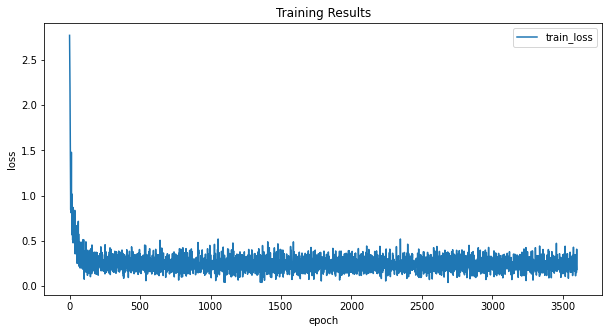

In [38]:
def plot_loss(loss):
    plt.figure(figsize=(10, 5))
    plt.plot(loss, label='train_loss')
    plt.legend()
    plt.title('Training Results')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

plot_loss(train_loss_all)

In [549]:
PATH = './Model/model_rnn.pt'

# save
torch.save(model.state_dict(), PATH)

'''
# load
model = Seq2Seq(encoder, decoder)   # TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
'''

&#39;\n# load\nmodel = Seq2Seq(encoder, decoder)   # TheModelClass(*args, **kwargs)\nmodel.load_state_dict(torch.load(PATH))\nmodel.eval()\n&#39;

In [39]:
# This function takes in the model and character as arguments and returns the next character prediction and hidden state
def predict(model, operation):
    # One-hot encoding our input to fit into the model
    
    operation = np.array([[oper2ind[oper] for oper in operation]])
    operation = embeddings(operation, dict_size, operation.shape[1], 1)
    operation = torch.from_numpy(operation)
    operation.to(device)
    
    out, hidden = model(operation)

    prob = nn.functional.softmax(out[-1], dim=0).data
    # Taking the class with the highest probability score from the output
    oper_ind = torch.max(prob, dim=0)[1].item()

    return ind2oper[oper_ind], hidden

In [40]:
# This function takes the desired output length and input characters as arguments, returning the produced sentence
# This function will output next out_len prediction results
def sample(model, out_len, start):
    model.eval() # eval mode
    #start = start.lower()
    # First off, run through the starting characters
    opers = [oper for oper in start]
    size = out_len - len(opers)
    res = []
    # Now pass in the previous characters and get a new one
    for ii in range(size):
        pred_oper, h = predict(model, opers)
        #if pred_oper == 'PAD_IDX':
         #   break
        opers.append(pred_oper)
        res.append(pred_oper)
    return ', '.join(res)

In [41]:
res1 = sample(model, 8, ['switch_greeting', 'switch_pa'])

res2 = sample(model, 8, ['switch_greeting', 'switch_pa', 'switch_rating_importance'])

res3 = sample(model, 8, ['switch_rating_importance', 'switch_rating_confidence'])

res4 = sample(model, 8, ['switch_step_count', 'switch_goal_setting'])

# res5 = sample(model, 15, ['load_data', 'head_overview', 'dataset_shape', 'where_nan', 'drop_duplicates', 'heatmap', 'feature_selection'])

# res6 = sample(model, 15, ['import_packages', 'create_dataframe', 'column_name_all', 'dataset_length', 'dataset_dtype', 'head_overview', 'nan_matrix', 'drop_na', 'distribution'])

# res7 = sample(model, 15, ['where_nan', 'fill_na', 'drop_duplicates', 'plot', 'scaler', 'sampling', 'feature_selection', 'regression_model'])

# res8 = sample(model, 15, ['scaler', 'sampling', 'feature_selection'])

# res9 = sample(model, 15, ['one_hot_encoding', 'feature_selection', 'train_test_split', 'regression_model'])

# res10 = sample(model, 15, ['initial_pipeline', 'preprocessing_pipeline', 'feature_selection', 'train_test_split'])

# res11 = sample(model, 15, ['initial_pipeline', 'preprocessing_pipeline', 'feature_engineering_pipeline'])

In [42]:
print('res1: ', res1, '\n\n')
print('res2: ', res2, '\n\n')
print('res3: ', res3, '\n\n')
print('res4: ', res4, '\n\n')
# print('res5: ', res5, '\n\n')
# print('res6: ', res6, '\n\n')
# print('res7: ', res7, '\n\n')
# print('res8: ', res8, '\n\n')
# print('res9: ', res9, '\n\n')
# print('res10: ', res10, '\n\n')
# print('res11: ', res11, '\n\n')

res1:  switch_rating_confidence, switch_motivator, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX 


res2:  switch_motivator, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX 


res3:  switch_motivator, switch_motivator, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX 


res4:  PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX 




In [353]:
# This function will predict as time series forecasting
def test(model, test_input_seq, test_target_seq):
    model.eval() # eval mode
    #start = start.lower()
    # First off, run through the starting characters
    opers = [oper for oper in test_input_seq]
    size = len(opers)
    res = []
    # Now pass in the previous characters and get a new one
    for ii in range(size):
    #for ii in range(size):
        pred_oper, h = predict(model, opers[:ii+1])
        # print(opers[:ii+1])
        #if pred_oper == 'PAD_IDX':
         #   break
        res.append(pred_oper)
    #print(', '.join(res))
    #print(score)
    return res, ', '.join(res)

In [354]:
test_input = ['load_data', 'head_overview', 'dataset_shape', 'nan_matrix', 'drop_duplicates', 'heatmap', 'feature_selection']
test_target = ['head_overview', 'dataset_shape', 'nan_matrix', 'drop_duplicates', 'heatmap', 'feature_selection', 'scaler']

test(model, test_input, test_target)

([&#39;filter_by_conditions&#39;,
  &#39;tail_overview&#39;,
  &#39;where_nan&#39;,
  &#39;extract_duplicates&#39;,
  &#39;dataset_shape&#39;,
  &#39;one_hot_encoding&#39;,
  &#39;extract_specific_column_by_name&#39;],
 &#39;filter_by_conditions, tail_overview, where_nan, extract_duplicates, dataset_shape, one_hot_encoding, extract_specific_column_by_name&#39;)

In [357]:
bleu_scores_1, bleu_scores_2, bleu_scores_avg = [], [], []

for i, inputs in enumerate(test_input_seq[:3]):
    inp = [ind2oper[j] for j in inputs]
    label = [ind2oper[j] for j in test_target_seq[i]]
    pred_list, pred_str = test(model, inp, label)

    while 'PAD_IDX' in label:
        label.remove('PAD_IDX')

    while 'PAD_IDX' in pred_list:
        pred_list.remove('PAD_IDX')
    
    score_1 = sentence_bleu([label], pred_list, weights=(1, 0, 0, 0))
    score_2 = sentence_bleu([label], pred_list, weights=(0, 1, 0, 0))
    score_avg = sentence_bleu([label], pred_list, weights=(0.5, 0.5, 0, 0))

    '''
    print(score)
    print(label, '\n')
    print(pred_list, '\n')
    '''
    bleu_scores_1.append(score_1)
    bleu_scores_2.append(score_2)
    bleu_scores_avg.append(score_avg)


print('BLEU score - 1-Gram: ', np.mean(bleu_scores_1))
print('BLEU score - 2-Gram: ', np.mean(bleu_scores_2))
print('BLEU score - Avg-Gram: ', np.mean(bleu_scores_avg))

BLEU score - 1-Gram:  0.4351851851851852
BLEU score - 2-Gram:  0.04166666666666668
BLEU score - Avg-Gram:  0.08784104611578832


In [358]:
from rouge import Rouge

rouge_scores_1, rouge_scores_2, rouge_scores_l, = [], [], []

for i, inputs in enumerate(test_input_seq[:3]):
    inp = [ind2oper[j] for j in inputs]
    label = [ind2oper[j] for j in test_target_seq[i]]
    pred_list, pred_str = test(model, inp, label)

    while 'PAD_IDX' in label:
        label.remove('PAD_IDX')

    while 'PAD_IDX' in pred_list:
        pred_list.remove('PAD_IDX')

    label = ' '.join(label)
    pred_list = ' '.join(pred_list)

    rouge = Rouge()
    rouge_score = rouge.get_scores(pred_list, label)   # (pred, label)

    rouge_scores_1.append(rouge_score[0]["rouge-1"]['r'])
    rouge_scores_2.append(rouge_score[0]["rouge-2"]['r'])
    rouge_scores_l.append(rouge_score[0]["rouge-l"]['r'])


print('ROUGE-1 score: ', np.mean(rouge_scores_1))
print('ROUGE-2 score: ', np.mean(rouge_scores_2))
print('ROUGE-l score: ', np.mean(rouge_scores_l))

ROUGE-1 score:  0.4351851851851852
ROUGE-2 score:  0.041666666666666664
ROUGE-l score:  0.39814814814814814


# LSTM for next operation prediction recom

In [43]:
# get training dataset
df_sentences_ids = []
for i in range(len(df_sentences)):
    lists = [oper2ind[str(j)] for j in df_sentences.iloc[i] if j != 'PAD_IDX']
    #print(lists)
    df_sentences_ids.append(lists)

random.shuffle(df_sentences_ids)

maxlen = len(max(df_sentences_ids, key=len))

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_sentences_ids, test_size=0.05)

In [45]:
# Creating lists that will hold our input and target sequences
train_input_seq = []
train_target_seq = []
for i in range(len(train)):
    '''
    # Remove last character for input sequence
    train_input_seq.append(train[i][:-1])
    
    # Remove first character for target sequence
    train_target_seq.append(train[i][1:])
    '''
    inputs = []
    target = []
    inputs.extend(train[i][:-1])
    target.extend(train[i][1:])

    while len(inputs) < maxlen:
        inputs.append(10)

    while len(target) < maxlen:
        target.append(10)

    train_input_seq.append(inputs)
    train_target_seq.append(target)

    print("Input Sequence: {}\nTarget Sequence: {}".format(train_input_seq[i], train_target_seq[i]))


# Creating lists that will hold our input and target sequences
test_input_seq = []
test_target_seq = []
for i in range(len(test)):
    # Remove last character for input sequence
    inputs = []
    target = []
    inputs.extend(test[i][:-1])
    target.extend(test[i][1:])

    while len(inputs) < maxlen:
        inputs.append(10)

    while len(target) < maxlen:
        target.append(10)

    test_input_seq.append(inputs)
    test_target_seq.append(target)
    
    print("Input Sequence: {}\nTarget Sequence: {}".format(test_input_seq[i], test_target_seq[i]))

Input Sequence: [10, 10, 10, 10, 10]
Target Sequence: [10, 10, 10, 10, 10]
Input Sequence: [7, 8, 10, 10, 10]
Target Sequence: [8, 9, 10, 10, 10]
Input Sequence: [2, 8, 10, 10, 10]
Target Sequence: [8, 9, 10, 10, 10]
Input Sequence: [6, 7, 8, 10, 10]
Target Sequence: [7, 8, 9, 10, 10]
Input Sequence: [2, 10, 10, 10, 10]
Target Sequence: [9, 10, 10, 10, 10]
Input Sequence: [0, 6, 10, 10, 10]
Target Sequence: [6, 8, 10, 10, 10]
Input Sequence: [10, 10, 10, 10, 10]
Target Sequence: [10, 10, 10, 10, 10]
Input Sequence: [10, 10, 10, 10, 10]
Target Sequence: [10, 10, 10, 10, 10]
Input Sequence: [10, 10, 10, 10, 10]
Target Sequence: [10, 10, 10, 10, 10]
Input Sequence: [1, 10, 10, 10, 10]
Target Sequence: [9, 10, 10, 10, 10]
Input Sequence: [1, 10, 10, 10, 10]
Target Sequence: [5, 10, 10, 10, 10]
Input Sequence: [8, 10, 10, 10, 10]
Target Sequence: [9, 10, 10, 10, 10]
Input Sequence: [10, 10, 10, 10, 10]
Target Sequence: [10, 10, 10, 10, 10]
Input Sequence: [8, 10, 10, 10, 10]
Target Sequence

In [46]:
dict_size = len(oper2ind)
print(dict_size)

seq_len = maxlen - 1
print(seq_len)

train_batch_size = len(train)
print(train_batch_size)

test_batch_size = len(test)
print(test_batch_size)

def embeddings(sequence, dict_size, seq_len, batch_size):
    # Creating a multi-dimensional array of zeros with the desired output shape
    features = np.zeros((batch_size, seq_len, dict_size), dtype=np.float32)
    
    # Replacing the 0 at the relevant character index with a 1 to represent that character
    for i in range(batch_size):
        for u in range(seq_len):
            features[i, u, sequence[i][u]] = 1
    return features

# Input shape --> (Batch Size, Sequence Length, One-Hot Encoding Size)
train_input_seq = embeddings(train_input_seq, dict_size, seq_len, train_batch_size)
train_target_seq = embeddings(train_target_seq, dict_size, seq_len, train_batch_size)

14
4
380
20


In [47]:
import torch
from torch import nn
from torch.utils.data import TensorDataset, DataLoader

train_input_seq = torch.from_numpy(train_input_seq)
train_target_seq = torch.Tensor(train_target_seq)

'''
test_input_seq = torch.from_numpy(test_input_seq)
test_target_seq = torch.Tensor(test_target_seq)

test_input_seq = torch.from_numpy(np.array(test_input_seq))
test_target_seq = torch.Tensor(np.array(test_target_seq))
'''
print(train_input_seq.size())
print(train_target_seq.size())


batch_size = 50
train_data = TensorDataset(train_input_seq, train_target_seq)
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)

torch.Size([380, 4, 14])
torch.Size([380, 4, 14])


In [48]:
# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")

GPU not available, CPU used


In [49]:
class Model(nn.Module):
    def __init__(self, input_size, output_size, hidden_dim, n_layers):
        super(Model, self).__init__()

        # Defining some parameters
        self.hidden_dim = hidden_dim
        self.n_layers = n_layers

        #Defining the layers
        # RNN Layer
        self.gru = nn.GRU(input_size, hidden_dim, n_layers, batch_first=True)   
        self.dropout = nn.Dropout(0.05)

        # Fully connected layer
        self.fc = nn.Linear(hidden_dim, output_size)
    
    def forward(self, x):
        #print('batch_size: ', x.size())
        batch_size = x.size(0)
        
        # Initializing hidden state for first input using method defined below
        hidden = self.init_hidden(batch_size)

        print('inputs: ', x.size())
        print('hidden size: ', hidden.size())

        # Passing in the input and hidden state into the model and obtaining outputs
        out, hidden = self.gru(x, hidden)
        print('out: ', out.size())
        
        # Reshaping the outputs such that it can be fit into the fully connected layer
        out = out.contiguous().view(-1, self.hidden_dim)
        
        out = self.dropout(out)
        out = self.fc(out)
        #print('output: ', out.size())
        #print(out.size())
        return out, hidden
    
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        #hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)
        hidden = torch.zeros(self.n_layers, batch_size, self.hidden_dim)

        return hidden

In [50]:
# Instantiate the model with hyperparameters
model_gru = Model(input_size=dict_size, output_size=dict_size, hidden_dim=64, n_layers=1)
# We'll also set the model to the device that we defined earlier (default is CPU)
model_gru.to(device)

# Define hyperparameters
n_epochs = 2
lr=0.005

# Define Loss, Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [51]:
# Training Run
train_loss_all = []

for epoch in range(1, n_epochs + 1):
    epoch_loss = []
    for inputs, labels in train_loader:

        optimizer.zero_grad() # Clears existing gradients from previous epoch

        output, hidden = model_gru(inputs)

        #print('output: ', output.view(-1, dict_size).size())
        #print('target_seq: ', train_target_seq.view(-1, dict_size).size())
        #print('\n')
        #a = torch.max(target_seq.view(-1, dict_size), 1)[1]
        #b = torch.max(output, 1)[1]
        #print(a.size(), b.size())
        #print(a, b)

        loss = criterion(output, torch.max(labels.view(-1, dict_size),1)[1]) #torch.max(train_target_seq[0], 1)[1]) #

        loss.backward(retain_graph=True) # Does backpropagation and calculates gradients
        optimizer.step() # Updates the weights accordingly

        train_loss_all.append(loss.item())

        epoch_loss.append(loss.item())

    if epoch % 10 == 0:
        print('Epoch: {}/{}.............'.format(epoch, n_epochs), end=' ')
        print("Epoch Loss: {:.4f}".format(np.mean(epoch_loss)))

inputs:  torch.Size([50, 4, 14])
hidden size:  torch.Size([1, 50, 64])
out:  torch.Size([50, 4, 64])
inputs:  torch.Size([50, 4, 14])
hidden size:  torch.Size([1, 50, 64])
out:  torch.Size([50, 4, 64])
inputs:  torch.Size([50, 4, 14])
hidden size:  torch.Size([1, 50, 64])
out:  torch.Size([50, 4, 64])
inputs:  torch.Size([50, 4, 14])
hidden size:  torch.Size([1, 50, 64])
out:  torch.Size([50, 4, 64])
inputs:  torch.Size([50, 4, 14])
hidden size:  torch.Size([1, 50, 64])
out:  torch.Size([50, 4, 64])
inputs:  torch.Size([50, 4, 14])
hidden size:  torch.Size([1, 50, 64])
out:  torch.Size([50, 4, 64])
inputs:  torch.Size([50, 4, 14])
hidden size:  torch.Size([1, 50, 64])
out:  torch.Size([50, 4, 64])
inputs:  torch.Size([30, 4, 14])
hidden size:  torch.Size([1, 30, 64])
out:  torch.Size([30, 4, 64])
inputs:  torch.Size([50, 4, 14])
hidden size:  torch.Size([1, 50, 64])
out:  torch.Size([50, 4, 64])
inputs:  torch.Size([50, 4, 14])
hidden size:  torch.Size([1, 50, 64])
out:  torch.Size([50

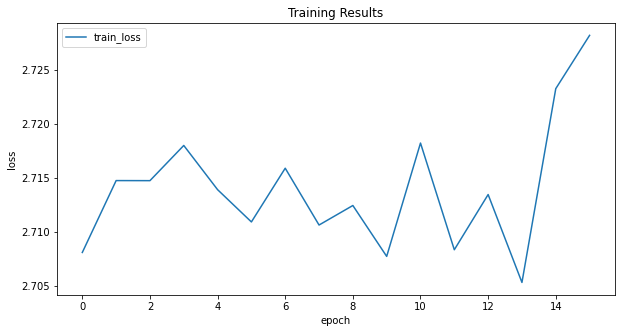

In [52]:
def plot_loss(loss):
    plt.figure(figsize=(10, 5))
    plt.plot(loss, label='train_loss')
    plt.legend()
    plt.title('Training Results')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

plot_loss(train_loss_all)

In [617]:
PATH = './Model/model_gru.pt'

# save
torch.save(model.state_dict(), PATH)

'''
# load
model = Seq2Seq(encoder, decoder)   # TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
'''

&#39;\n# load\nmodel = Seq2Seq(encoder, decoder)   # TheModelClass(*args, **kwargs)\nmodel.load_state_dict(torch.load(PATH))\nmodel.eval()\n&#39;

In [53]:
# This function takes in the model and character as arguments and returns the next character prediction and hidden state
def predict(model, operation):
    # One-hot encoding our input to fit into the model
    
    operation = np.array([[oper2ind[oper] for oper in operation]])
    operation = embeddings(operation, dict_size, operation.shape[1], 1)
    operation = torch.from_numpy(operation)
    operation.to(device)
    
    out, hidden = model(operation)

    prob = nn.functional.softmax(out[-1], dim=0).data
    # Taking the class with the highest probability score from the output
    oper_ind = torch.max(prob, dim=0)[1].item()

    return ind2oper[oper_ind], hidden


# This function takes the desired output length and input characters as arguments, returning the produced sentence
# This function will output next out_len prediction results
def sample(model, out_len, start):
    model.eval() # eval mode
    #start = start.lower()
    # First off, run through the starting characters
    opers = [oper for oper in start]
    size = out_len - len(opers)
    res = []
    # Now pass in the previous characters and get a new one
    for ii in range(size):
        pred_oper, h = predict(model, opers)
        #if pred_oper == 'PAD_IDX':
         #   break
        opers.append(pred_oper)
        res.append(pred_oper)
    return ', '.join(res)

In [54]:
res1 = sample(model, 8, ['switch_greeting', 'switch_pa'])

res2 = sample(model, 8, ['switch_greeting', 'switch_pa', 'switch_rating_importance'])

res3 = sample(model, 8, ['switch_rating_importance', 'switch_rating_confidence'])

res4 = sample(model, 8, ['switch_step_count', 'switch_goal_setting'])

In [55]:
print('res1: ', res1, '\n\n')
print('res2: ', res2, '\n\n')
print('res3: ', res3, '\n\n')
print('res4: ', res4, '\n\n')


res1:  switch_rating_confidence, switch_motivator, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX 


res2:  switch_motivator, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX 


res3:  switch_motivator, switch_motivator, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX 


res4:  PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX 




In [624]:
# This function will predict as time series forecasting
def test(model, test_input_seq, test_target_seq):
    model.eval() # eval mode
    #start = start.lower()
    # First off, run through the starting characters
    opers = [oper for oper in test_input_seq]
    size = len(opers)
    res = []
    # Now pass in the previous characters and get a new one
    for ii in range(size):
    #for ii in range(size):
        pred_oper, h = predict(model, opers[:ii+1])
        # print(opers[:ii+1])
        #if pred_oper == 'PAD_IDX':
         #   break
        res.append(pred_oper)
    #print(', '.join(res))
    #print(score)
    return res, ', '.join(res)

In [625]:
test_input = ['load_data', 'head_overview', 'dataset_shape', 'nan_matrix', 'drop_duplicates', 'heatmap', 'feature_selection']
test_target = ['head_overview', 'dataset_shape', 'nan_matrix', 'drop_duplicates', 'heatmap', 'feature_selection', 'scaler']

test(model_gru, test_input, test_target)

([&#39;filter_by_conditions&#39;,
  &#39;train_test_split&#39;,
  &#39;train_test_split&#39;,
  &#39;delete_by_column_row&#39;,
  &#39;delete_by_column_row&#39;,
  &#39;delete_by_column_row&#39;,
  &#39;delete_by_column_row&#39;],
 &#39;filter_by_conditions, train_test_split, train_test_split, delete_by_column_row, delete_by_column_row, delete_by_column_row, delete_by_column_row&#39;)

In [627]:
bleu_scores_1, bleu_scores_2, bleu_scores_avg = [], [], []

for i, inputs in enumerate(test_input_seq[:3]):
    inp = [ind2oper[j] for j in inputs]
    label = [ind2oper[j] for j in test_target_seq[i]]
    pred_list, pred_str = test(model_gru, inp, label)

    while 'PAD_IDX' in label:
        label.remove('PAD_IDX')

    while 'PAD_IDX' in pred_list:
        pred_list.remove('PAD_IDX')
    
    score_1 = sentence_bleu([label], pred_list, weights=(1, 0, 0, 0))
    score_2 = sentence_bleu([label], pred_list, weights=(0, 1, 0, 0))
    score_avg = sentence_bleu([label], pred_list, weights=(0.5, 0.5, 0, 0))

    '''
    print(score)
    print(label, '\n')
    print(pred_list, '\n')
    '''
    bleu_scores_1.append(score_1)
    bleu_scores_2.append(score_2)
    bleu_scores_avg.append(score_avg)


print('BLEU score - 1-Gram: ', np.mean(bleu_scores_1))
print('BLEU score - 2-Gram: ', np.mean(bleu_scores_2))
print('BLEU score - Avg-Gram: ', np.mean(bleu_scores_avg))

BLEU score - 1-Gram:  0.0
BLEU score - 2-Gram:  0.0
BLEU score - Avg-Gram:  0.0


In [628]:
from rouge import Rouge

rouge_scores_1, rouge_scores_2, rouge_scores_l, = [], [], []

for i, inputs in enumerate(test_input_seq[:3]):
    inp = [ind2oper[j] for j in inputs]
    label = [ind2oper[j] for j in test_target_seq[i]]
    pred_list, pred_str = test(model_gru, inp, label)

    while 'PAD_IDX' in label:
        label.remove('PAD_IDX')

    while 'PAD_IDX' in pred_list:
        pred_list.remove('PAD_IDX')

    label = ' '.join(label)
    pred_list = ' '.join(pred_list)

    rouge = Rouge()
    rouge_score = rouge.get_scores(pred_list, label)   # (pred, label)

    rouge_scores_1.append(rouge_score[0]["rouge-1"]['r'])
    rouge_scores_2.append(rouge_score[0]["rouge-2"]['r'])
    rouge_scores_l.append(rouge_score[0]["rouge-l"]['r'])


print('ROUGE-1 score: ', np.mean(rouge_scores_1))
print('ROUGE-2 score: ', np.mean(rouge_scores_2))
print('ROUGE-l score: ', np.mean(rouge_scores_l))

ROUGE-1 score:  0.0
ROUGE-2 score:  0.0
ROUGE-l score:  0.0


# Seq2seq with attention for next operation prediction recom

In [452]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [461]:
dict_final_emb = np.load('./Embeddings/dict_final_emb.npy', allow_pickle=True).item()

df_sentences = pd.read_csv('/Users/xinsun/Desktop/test_copy/codes/df_sentences.csv', header=0, index_col=0)
df_sentences = df_sentences.fillna('PAD_IDX')
print(len(df_sentences))

df_sentences.head()

2750


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,import_packages,load_data,reset_index,head_overview,tail_overview,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
1,import_packages,create_dataframe,head_overview,tail_overview,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
2,import_packages,load_data,where_nan,nan_matrix,filter_by_conditions,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
3,import_packages,create_dataframe,unique_value_in_specific_column,distribution,scaler,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
4,import_packages,load_data,index_info,reset_index,set_index_by_specified_column,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX


In [462]:
# get training dataset
df_sentences_ids = []
for i in range(len(df_sentences)):
    lists = [oper2ind[str(j)] for j in df_sentences.iloc[i] if j != 'PAD_IDX']
    #print(lists)
    df_sentences_ids.append(lists)

#df_sentences = df_sentences.sample(frac=1, replace=True, random_state=1).reset_index(drop=True)

train, test = train_test_split(df_sentences, test_size=0.05)
train, test = train.reset_index(drop=True), test.reset_index(drop=True)

In [463]:
train

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,sort_index,head_overview,tail_overview,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
1,dataset_length,column_name_all,extract_specific_row_by_index,filter_by_conditions,sort_value_by_column,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
2,classification_model_pipeline,save_data,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
3,change_to_datetime,dataset_dtype,tail_overview,head_overview,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
4,fill_na,sort_value_by_column,set_index_by_specified_column,insert_new_column,extract_specific_column_by_name,change_specified_column_type,filter_by_conditions,head_overview,tail_overview,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2607,tail_overview,head_overview,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
2608,sampling,one_hot_encoding,train_test_split,head_overview,tail_overview,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
2609,extract_specific_row_by_index,set_index_by_specified_column,unique_value_in_specific_column,reset_index,head_overview,tail_overview,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
2610,extract_specific_row_by_index,unique_value_in_specific_column,reset_index,set_index_by_specified_column,head_overview,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX


In [464]:
def load_data(df):
    data = []
    for i in range(len(df)):
        lists = [j for j in df.iloc[i] if j != 'PAD_IDX']
        # print(lists)
        data.append(lists)
    
    inputs = []
    target = []
    num_examples = 0
    maxlen = len(max(data, key=len))

    for line in data:
          inputs.append(line[:-1] + ["EOS"])  # inputs.append(line[:-1] + ["EOS"])

    for line in data:
          target.append(["BOS"] + line[1:] + ["EOS"])   # target.append(["BOS"] + line[1:] + ["EOS"])
    
    return inputs, target


train_input, train_target = load_data(train)
test_input, test_target = load_data(test)


In [465]:
train_input[0]

[&#39;sort_index&#39;, &#39;head_overview&#39;, &#39;EOS&#39;]

In [466]:
train_target[0]

[&#39;BOS&#39;, &#39;head_overview&#39;, &#39;tail_overview&#39;, &#39;EOS&#39;]

In [467]:
for i in range(len(train_input)):
    while len(train_input[i]) < maxlen:
        train_input[i].append('PAD_IDX')

for i in range(len(train_target)):
    while len(train_target[i]) < maxlen:
        train_target[i].append('PAD_IDX')


for i in range(len(test_input)):
    while len(test_input[i]) < maxlen:
        test_input[i].append('PAD_IDX')

for i in range(len(test_target)):
    while len(test_target[i]) < maxlen:
        test_target[i].append('PAD_IDX')

In [468]:
print(train_input[0], '\n')

print(train_target[0])

[&#39;sort_index&#39;, &#39;head_overview&#39;, &#39;EOS&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;] 

[&#39;BOS&#39;, &#39;head_overview&#39;, &#39;tail_overview&#39;, &#39;EOS&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;]


In [469]:
def embedding(text_sentences, summ_sentences, oper2ind, sort_by_len=False):
    '''
    Embedding the raw text sequence to digit index sequence
    '''
    length = len(text_sentences)
    out_text_sentences = [[oper2ind.get(w, 56) for w in sent] for sent in text_sentences]
    out_summ_sentences = [[oper2ind.get(w, 56) for w in sent] for sent in summ_sentences]

    # sort sentences by english lengths
    def len_argsort(seq):
        return sorted(range(len(seq)), key=lambda x: len(seq[x]))
       
    if sort_by_len:
        sorted_index = len_argsort(out_text_sentences)
        out_text_sentences = [out_text_sentences[i] for i in sorted_index]
        out_summ_sentences = [out_summ_sentences[i] for i in sorted_index]
        
    return out_text_sentences, out_summ_sentences

train_inputs, train_target = embedding(train_input, train_target, oper2ind)
# test_input, test_target = embedding(test_input, test_target, oper2ind)

In [470]:
train_inputs[0]

[17,
 11,
 58,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55,
 55]

In [471]:
def get_minibatches(n, minibatch_size, shuffle=True):
    idx_list = np.arange(0, n, minibatch_size)
    if shuffle:
        np.random.shuffle(idx_list)
    minibatches = []
    for idx in idx_list:
        minibatches.append(np.arange(idx, min(idx + minibatch_size, n)))
    return minibatches

def prepare_data(seqs):
    lengths = [len(seq) for seq in seqs]
    n_samples = len(seqs)
    max_len = np.max(lengths)

    x = np.zeros((n_samples, max_len)).astype('int32')
    x_lengths = np.array(lengths).astype("int32")
    for idx, seq in enumerate(seqs):
        x[idx, :lengths[idx]] = seq
    return x, x_lengths #x_mask

def gen_examples(text_sentences, summ_sentences, batch_size):
    minibatches = get_minibatches(len(text_sentences), batch_size)
    all_ex = []
    for minibatch in minibatches:
        mb_text_sentences = [text_sentences[t] for t in minibatch]
        mb_summ_sentences = [summ_sentences[t] for t in minibatch]
        mb_x, mb_x_len = prepare_data(mb_text_sentences)
        mb_y, mb_y_len = prepare_data(mb_summ_sentences)
        all_ex.append((mb_x, mb_x_len, mb_y, mb_y_len))
    return all_ex


batch_size = 50
train_data = gen_examples(train_inputs, train_target, batch_size)
# test_data = gen_examples(test_inputs, test_target, batch_size)

import random
random.shuffle(train_data)
# random.shuffle(test_data)

In [472]:
'''
def create_embeddings(vect, idx2word, emb_size, pad_idx=1):
    emb = nn.Embedding(len(idx2word), emb_size, padding_idx=pad_idx)
    weights = emb.weight.data
    print(weights)
    for i, word in enumerate(idx2word):
        try:
            weights[i] = torch.from_numpy(vect[word] * 3)
        except:
            pass
    emb.weight.requires_grad = True
    print(emb.weight.data)
    
    return emb
'''

def create_embeddings(vect, idx2word, emb_size, pad_idx=55):
    emb = nn.Embedding(len(idx2word), emb_size, padding_idx=pad_idx)
    weights = emb.weight.data
    print(weights)
    for i, word in enumerate(idx2word):
        try:
            #weights[i] = torch.from_numpy(vect[word])
            #print(idx2word[i])
            #print(vect[idx2word[i]])
            weights[i] = torch.from_numpy(vect[idx2word[i]])
        except:
           pass
    emb.weight.requires_grad = True
    print(emb.weight.data)
    return emb

emb_vec = create_embeddings(dict_final_emb, ind2oper, 100, pad_idx=55)

tensor([[ 0.8922,  0.3397, -0.1888,  ..., -0.5638, -1.7531, -0.2461],
        [-0.3325,  0.0453,  0.3362,  ..., -0.3447,  0.0629,  2.2837],
        [-1.0926, -0.1609, -0.6904,  ...,  1.0055,  1.6639, -1.4984],
        ...,
        [ 0.3016, -1.0152,  0.7962,  ..., -0.4864,  0.8354, -1.5523],
        [-0.1912, -0.3787,  0.1254,  ..., -0.2498, -0.9904, -0.0695],
        [-0.4370, -1.7043,  1.3573,  ..., -1.5151,  0.0253, -0.4213]])
tensor([[ -7.2209,  -1.2649,  11.9355,  ...,   0.5864,   0.4105,  -0.2224],
        [-12.0324,  -0.8521,   0.7524,  ...,   0.0666,   1.2406,   0.7580],
        [ -4.0371,  -2.8929,  -0.1188,  ...,  -1.1868,   1.0977,  -0.1958],
        ...,
        [  0.3016,  -1.0152,   0.7962,  ...,  -0.4864,   0.8354,  -1.5523],
        [ -0.1912,  -0.3787,   0.1254,  ...,  -0.2498,  -0.9904,  -0.0695],
        [ -0.4370,  -1.7043,   1.3573,  ...,  -1.5151,   0.0253,  -0.4213]])


In [473]:
emb_vec.weight.data

tensor([[ -7.2209,  -1.2649,  11.9355,  ...,   0.5864,   0.4105,  -0.2224],
        [-12.0324,  -0.8521,   0.7524,  ...,   0.0666,   1.2406,   0.7580],
        [ -4.0371,  -2.8929,  -0.1188,  ...,  -1.1868,   1.0977,  -0.1958],
        ...,
        [  0.3016,  -1.0152,   0.7962,  ...,  -0.4864,   0.8354,  -1.5523],
        [ -0.1912,  -0.3787,   0.1254,  ...,  -0.2498,  -0.9904,  -0.0695],
        [ -0.4370,  -1.7043,   1.3573,  ...,  -1.5151,   0.0253,  -0.4213]])

In [474]:
print(len(train_data))
print(len(train_data[0]))
print(len(train_data[0][0]))
print(len(train_data[0][0][1]))

print(train_data[0][0][0])

53
4
50
23
[25 34 35 10 23 11 58 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55 55]


In [475]:
'''
# without pre-trained embedding
class Encoder(nn.Module):
    def __init__(self, vocab_size, embed_size, enc_hidden_size, dec_hidden_size, dropout=0.2):
        super(Encoder, self).__init__()
        self.embed = nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(embed_size, enc_hidden_size, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(enc_hidden_size * 2, dec_hidden_size)

    def forward(self, x, lengths):
        sorted_len, sorted_idx = lengths.sort(0, descending=True)
        x_sorted = x[sorted_idx.long()]
        embedded = self.dropout(self.embed(x_sorted))
        
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, sorted_len.long().cpu().data.numpy(), batch_first=True)
        packed_out, hid = self.rnn(packed_embedded)
        out, _ = nn.utils.rnn.pad_packed_sequence(packed_out, batch_first=True)
        _, original_idx = sorted_idx.sort(0, descending=False)
        out = out[original_idx.long()].contiguous()
        hid = hid[:, original_idx.long()].contiguous()
        
        hid = torch.cat([hid[-2], hid[-1]], dim=1)
        hid = torch.tanh(self.fc(hid)).unsqueeze(0)

        return out, hid


class Attention(nn.Module):
    def __init__(self, enc_hidden_size, dec_hidden_size):
        super(Attention, self).__init__()
        self.enc_hidden_size = enc_hidden_size
        self.dec_hidden_size = dec_hidden_size
        self.linear_in = nn.Linear(enc_hidden_size*2, dec_hidden_size, bias=False)
        self.linear_out = nn.Linear(enc_hidden_size*2 + dec_hidden_size, dec_hidden_size)
        
    def forward(self, output, context, mask):
        # output: batch_size, output_len, dec_hidden_size
        # context: batch_size, context_len, enc_hidden_size
        batch_size = output.size(0)
        output_len = output.size(1)
        input_len = context.size(1)
        
        context_in = self.linear_in(context.view(batch_size*input_len, -1)).view(batch_size, input_len, -1) # batch_size, output_len, dec_hidden_size
        attn = torch.bmm(output, context_in.transpose(1,2)) # batch_size, output_len, context_len
  
        attn.data.masked_fill(mask, -1e6)

        attn = F.softmax(attn, dim=2) # batch_size, output_len, context_len

        context = torch.bmm(attn, context) # batch_size, output_len, enc_hidden_size
        
        output = torch.cat((context, output), dim=2) # batch_size, output_len, hidden_size*2
        
        output = output.view(batch_size*output_len, -1)
        output = torch.tanh(self.linear_out(output))
        output = output.view(batch_size, output_len, -1)
        return output, attn



class Decoder(nn.Module):
    def __init__(self, vocab_size, embed_size, enc_hidden_size, dec_hidden_size, dropout=0.2):
        super(Decoder, self).__init__()
        self.embed = self.embed = nn.Embedding(vocab_size, embed_size)
        self.attention = Attention(enc_hidden_size, dec_hidden_size)
        self.rnn = nn.GRU(embed_size, hidden_size, batch_first=True)
        self.out = nn.Linear(dec_hidden_size, vocab_size)
        self.dropout = nn.Dropout(dropout)

    def create_mask(self, x_len, y_len):
        device = x_len.device
        max_x_len = x_len.max()
        max_y_len = y_len.max()
        x_mask = torch.arange(max_x_len, device=x_len.device)[None, :] < x_len[:, None]
        y_mask = torch.arange(max_y_len, device=x_len.device)[None, :] < y_len[:, None]
        mask = (~x_mask[:, :, None] * y_mask[:, None, :]).byte()
        return mask
        
        
    def forward(self, ctx, ctx_lengths, y, y_lengths, hid):
        sorted_len, sorted_idx = y_lengths.sort(0, descending=True)
        y_sorted = y[sorted_idx.long()]
        hid = hid[:, sorted_idx.long()]
        
        y_sorted = self.dropout(self.embed(y_sorted)) # batch_size, output_length, embed_size

        packed_seq = nn.utils.rnn.pack_padded_sequence(y_sorted, sorted_len.long().cpu().data.numpy(), batch_first=True)
        out, hid = self.rnn(packed_seq, hid)
        unpacked, _ = nn.utils.rnn.pad_packed_sequence(out, batch_first=True)
        _, original_idx = sorted_idx.sort(0, descending=False)
        output_seq = unpacked[original_idx.long()].contiguous()
        hid = hid[:, original_idx.long()].contiguous()

        mask = self.create_mask(y_lengths, ctx_lengths)

        # code.interact(local=locals())
        output, attn = self.attention(output_seq, ctx, mask)
        output = F.log_softmax(self.out(output), -1)
        
        return output, hid, attn
'''

&#39;\n# without pre-trained embedding\nclass Encoder(nn.Module):\n    def __init__(self, vocab_size, embed_size, enc_hidden_size, dec_hidden_size, dropout=0.2):\n        super(Encoder, self).__init__()\n        self.embed = nn.Embedding(vocab_size, embed_size)\n        self.rnn = nn.GRU(embed_size, enc_hidden_size, batch_first=True, bidirectional=True)\n        self.dropout = nn.Dropout(dropout)\n        self.fc = nn.Linear(enc_hidden_size * 2, dec_hidden_size)\n\n    def forward(self, x, lengths):\n        sorted_len, sorted_idx = lengths.sort(0, descending=True)\n        x_sorted = x[sorted_idx.long()]\n        embedded = self.dropout(self.embed(x_sorted))\n        \n        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, sorted_len.long().cpu().data.numpy(), batch_first=True)\n        packed_out, hid = self.rnn(packed_embedded)\n        out, _ = nn.utils.rnn.pad_packed_sequence(packed_out, batch_first=True)\n        _, original_idx = sorted_idx.sort(0, descending=Fals

In [476]:
# with pre-trained embedding
class Encoder(nn.Module):
    def __init__(self, vecs_enc, idx2word_enc, em_sz_enc, vocab_size, embed_size, enc_hidden_size, dec_hidden_size, dropout=0.2):
        super(Encoder, self).__init__()
        self.embed = create_embeddings(vecs_enc, idx2word_enc, em_sz_enc, pad_idx=55)  # nn.Embedding(vocab_size, embed_size)
        self.rnn = nn.GRU(embed_size, enc_hidden_size, batch_first=True, bidirectional=True)
        self.dropout = nn.Dropout(dropout)
        self.fc = nn.Linear(enc_hidden_size * 2, dec_hidden_size)

    def forward(self, x, lengths):
        sorted_len, sorted_idx = lengths.sort(0, descending=True)
        x_sorted = x[sorted_idx.long()]
        embedded = self.dropout(self.embed(x_sorted))
        
        packed_embedded = nn.utils.rnn.pack_padded_sequence(embedded, sorted_len.long().cpu().data.numpy(), batch_first=True)
        packed_out, hid = self.rnn(packed_embedded)
        out, _ = nn.utils.rnn.pad_packed_sequence(packed_out, batch_first=True)
        _, original_idx = sorted_idx.sort(0, descending=False)
        out = out[original_idx.long()].contiguous()
        hid = hid[:, original_idx.long()].contiguous()
        
        hid = torch.cat([hid[-2], hid[-1]], dim=1)
        hid = torch.tanh(self.fc(hid)).unsqueeze(0)

        return out, hid


class Attention(nn.Module):
    def __init__(self, enc_hidden_size, dec_hidden_size):
        super(Attention, self).__init__()

        self.enc_hidden_size = enc_hidden_size
        self.dec_hidden_size = dec_hidden_size

        self.linear_in = nn.Linear(enc_hidden_size*2, dec_hidden_size, bias=False)
        self.linear_out = nn.Linear(enc_hidden_size*2 + dec_hidden_size, dec_hidden_size)
        
    def forward(self, output, context, mask):
        # output: batch_size, output_len, dec_hidden_size
        # context: batch_size, context_len, enc_hidden_size
    
        batch_size = output.size(0)
        output_len = output.size(1)
        input_len = context.size(1)
        
        context_in = self.linear_in(context.view(batch_size*input_len, -1)).view(batch_size, input_len, -1) # batch_size, output_len, dec_hidden_size
        attn = torch.bmm(output, context_in.transpose(1,2)) # batch_size, output_len, context_len
        
        attn.data.masked_fill(mask, -1e6)

        attn = F.softmax(attn, dim=2) # batch_size, output_len, context_len

        context = torch.bmm(attn, context) # batch_size, output_len, enc_hidden_size
        
        output = torch.cat((context, output), dim=2) # batch_size, output_len, hidden_size*2

        output = output.view(batch_size*output_len, -1)
        output = torch.tanh(self.linear_out(output))
        output = output.view(batch_size, output_len, -1)
        return output, attn


class Decoder(nn.Module):
    def __init__(self, vecs_dec, idx2word_dec, em_sz_dec, vocab_size, embed_size, enc_hidden_size, dec_hidden_size, dropout=0.2):
        super(Decoder, self).__init__()
        self.embed = create_embeddings(vecs_dec, idx2word_dec, em_sz_dec, pad_idx=55)  #nn.Embedding(vocab_size, embed_size)
        self.attention = Attention(enc_hidden_size, dec_hidden_size)
        self.rnn = nn.GRU(embed_size, hidden_size, batch_first=True)
        self.out = nn.Linear(dec_hidden_size, vocab_size)
        self.dropout = nn.Dropout(dropout)

    def create_mask(self, x_len, y_len):
        device = x_len.device
        max_x_len = x_len.max()
        max_y_len = y_len.max()
        x_mask = torch.arange(max_x_len, device=x_len.device)[None, :] < x_len[:, None]
        y_mask = torch.arange(max_y_len, device=x_len.device)[None, :] < y_len[:, None]
        mask = (~x_mask[:, :, None] * y_mask[:, None, :]).byte()
        return mask
        
        
    def forward(self, ctx, ctx_lengths, y, y_lengths, hid):
        sorted_len, sorted_idx = y_lengths.sort(0, descending=True)
        y_sorted = y[sorted_idx.long()]
        hid = hid[:, sorted_idx.long()]
        
        y_sorted = self.dropout(self.embed(y_sorted)) # batch_size, output_length, embed_size

        packed_seq = nn.utils.rnn.pack_padded_sequence(y_sorted, sorted_len.long().cpu().data.numpy(), batch_first=True)
        out, hid = self.rnn(packed_seq, hid)
        unpacked, _ = nn.utils.rnn.pad_packed_sequence(out, batch_first=True)
        _, original_idx = sorted_idx.sort(0, descending=False)
        output_seq = unpacked[original_idx.long()].contiguous()
        hid = hid[:, original_idx.long()].contiguous()

        mask = self.create_mask(y_lengths, ctx_lengths)

        # code.interact(local=locals())
        output, attn = self.attention(output_seq, ctx, mask)
        output = F.log_softmax(self.out(output), -1)
        
        return output, hid, attn  

In [477]:
class Seq2Seq(nn.Module):
    def __init__(self, encoder, decoder):
        super(Seq2Seq, self).__init__()
        self.encoder = encoder
        self.decoder = decoder
        
    def forward(self, x, x_lengths, y, y_lengths):
        encoder_out, hid = self.encoder(x, x_lengths)
        output, hid, attn = self.decoder(ctx=encoder_out, 
                    ctx_lengths=x_lengths,
                    y=y,
                    y_lengths=y_lengths,
                    hid=hid)
        return output, attn
    
    def predict(self, x, x_lengths, y, max_length):
        encoder_out, hid = self.encoder(x, x_lengths)
        preds = []
        batch_size = x.shape[0]
        attns = []
        for i in range(max_length):
            output, hid, attn = self.decoder(ctx=encoder_out, 
                    ctx_lengths=x_lengths,
                    y=y,
                    y_lengths=torch.ones(batch_size).long().to(y.device),
                    hid=hid)
            y = output.max(2)[1].view(batch_size, 1)
            preds.append(y)
            attns.append(attn)
        return torch.cat(preds, 1), torch.cat(attns, 1)

In [478]:
class LanguageModelCriterion(nn.Module):
    def __init__(self):
        super(LanguageModelCriterion, self).__init__()

    def forward(self, input, target, mask):
        input = input.contiguous().view(-1, input.size(2))
        target = target.contiguous().view(-1, 1)
        mask = mask.contiguous().view(-1, 1)
        output = -input.gather(1, target) * mask
        output = torch.sum(output) / torch.sum(mask)

        return output

In [479]:
def evaluate(model, data):
    model.eval()
    total_num_words = total_loss = 0.
    with torch.no_grad():
        for it, (mb_x, mb_x_lengths, mb_y, mb_y_lengths) in enumerate(data):
            mb_x = torch.from_numpy(mb_x).long().to(device)
            mb_x_lengths = torch.from_numpy(mb_x_lengths).long().to(device)
            mb_input = torch.from_numpy(mb_y[:,:-1]).long().to(device)
            mb_out = torch.from_numpy(mb_y[:, 1:]).long().to(device)
            
            mb_y_lengths = torch.from_numpy(mb_y_lengths-1).long().to(device)
            mb_y_lengths[mb_y_lengths <= 0] = 1

            mb_pred, attn = model(mb_x, mb_x_lengths, mb_input, mb_y_lengths)

            mb_out_mask = torch.arange(mb_y_lengths.max().item(), device=device)[None, :] < mb_y_lengths[:, None]
            mb_out_mask = mb_out_mask.float()
            
            loss = crit(mb_pred, mb_out, mb_out_mask)

            num_words = torch.sum(mb_y_lengths).item()
            total_loss += loss.item() * num_words
            total_num_words += num_words

    print("evaluation loss", total_loss/total_num_words)

In [480]:
def train(model, train_data, eval_data, num_epochs):
    ls = []
    for epoch in range(num_epochs):
        total_num_words = total_loss = 0.
        model.train()
        for it, (mb_x, mb_x_lengths, mb_y, mb_y_lengths) in enumerate(train_data):
            mb_x = torch.from_numpy(mb_x).long().to(device)
            mb_x_lengths = torch.from_numpy(mb_x_lengths).long().to(device)
            mb_input = torch.from_numpy(mb_y[:,:-1]).long().to(device)
            mb_out = torch.from_numpy(mb_y[:, 1:]).long().to(device)
        
            mb_y_lengths = torch.from_numpy(mb_y_lengths-1).long().to(device)
            mb_y_lengths[mb_y_lengths <= 0] = 1


            mb_pred, attn = model(mb_x, mb_x_lengths, mb_input, mb_y_lengths)

            mb_out_mask = torch.arange(mb_y_lengths.max().item(), device=device)[None, :] < mb_y_lengths[:, None]
            mb_out_mask = mb_out_mask.float()
            
            loss = crit(mb_pred, mb_out, mb_out_mask)

            num_words = torch.sum(mb_y_lengths).item()

            total_loss += loss.item() * num_words
            total_num_words += num_words

            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 5.)
            optimizer.step()

            if it % 50 == 0:
                print("epoch", epoch, "iteration", it, "loss", loss.item())
        
        print("epoch", epoch, "training loss", total_loss/total_num_words, '\n\n')
        ls.append(total_loss/total_num_words)

        if epoch % 5 == 0:
            print("evaluating on dev...")
            evaluate(model, eval_data)

    return ls    

In [481]:
# with bert embedding
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

text_vocab_size = len(oper2ind)
summ_vocab_size = len(ind2oper)
embed_dim = embed_size = 100
hidden_size = 100
dropout = 0.01

encoder = Encoder(vecs_enc=dict_final_emb, idx2word_enc=ind2oper, em_sz_enc=embed_dim, 
                  vocab_size=text_vocab_size, 
                  embed_size=embed_size, 
                  enc_hidden_size=hidden_size,
                  dec_hidden_size=hidden_size,
                  dropout=dropout)

decoder = Decoder(vecs_dec=dict_final_emb, idx2word_dec=ind2oper, em_sz_dec=embed_dim,
                  vocab_size=text_vocab_size, 
                  embed_size=embed_size, 
                  enc_hidden_size=hidden_size,
                  dec_hidden_size=hidden_size,
                  dropout=dropout)

model_emb_att = Seq2Seq(encoder, decoder)
model_emb_att = model_emb_att.to(device)
crit = LanguageModelCriterion().to(device)
optimizer = torch.optim.Adam(model_emb_att.parameters(), lr=0.001)

tensor([[ 2.2428, -1.6570,  0.8076,  ...,  0.4775,  0.2160, -0.3492],
        [ 0.2339, -0.0810,  1.2047,  ..., -0.5278,  0.3818,  0.4935],
        [ 0.7297, -0.5393, -0.1787,  ...,  0.6750,  0.0775,  0.9699],
        ...,
        [-1.9353,  0.6721, -1.5015,  ...,  1.1571,  0.1408,  1.1296],
        [-1.5409,  1.1632, -0.9041,  ...,  0.5264,  0.2806,  0.4169],
        [ 0.6605, -0.8444, -0.3353,  ..., -0.6402,  1.1112, -0.1574]])
tensor([[ -7.2209,  -1.2649,  11.9355,  ...,   0.5864,   0.4105,  -0.2224],
        [-12.0324,  -0.8521,   0.7524,  ...,   0.0666,   1.2406,   0.7580],
        [ -4.0371,  -2.8929,  -0.1188,  ...,  -1.1868,   1.0977,  -0.1958],
        ...,
        [ -1.9353,   0.6721,  -1.5015,  ...,   1.1571,   0.1408,   1.1296],
        [ -1.5409,   1.1632,  -0.9041,  ...,   0.5264,   0.2806,   0.4169],
        [  0.6605,  -0.8444,  -0.3353,  ...,  -0.6402,   1.1112,  -0.1574]])
tensor([[-0.5442, -0.8299,  0.9611,  ...,  1.3640,  0.3311,  1.4557],
        [ 0.9044,  0.3670,

In [482]:
loss = train(model_emb_att, train_data, train_data, 20)

epoch 0 iteration 0 loss 4.077421188354492
epoch 0 iteration 50 loss 0.7258322238922119
epoch 0 training loss 1.3544433892182932 


evaluating on dev...
evaluation loss 0.737488178476428
epoch 1 iteration 0 loss 0.6942097544670105
epoch 1 iteration 50 loss 0.5380694270133972
epoch 1 training loss 0.6423177696597864 


epoch 2 iteration 0 loss 0.521859347820282
epoch 2 iteration 50 loss 0.37968385219573975
epoch 2 training loss 0.476022472879879 


epoch 3 iteration 0 loss 0.35984399914741516
epoch 3 iteration 50 loss 0.21834547817707062
epoch 3 training loss 0.3120276905637097 


epoch 4 iteration 0 loss 0.2347811609506607
epoch 4 iteration 50 loss 0.14563846588134766
epoch 4 training loss 0.20079628005824782 


epoch 5 iteration 0 loss 0.16199849545955658
epoch 5 iteration 50 loss 0.10221542418003082
epoch 5 training loss 0.14023103482997273 


evaluating on dev...
evaluation loss 0.1095182657724135
epoch 6 iteration 0 loss 0.11167539656162262
epoch 6 iteration 50 loss 0.0757325366139

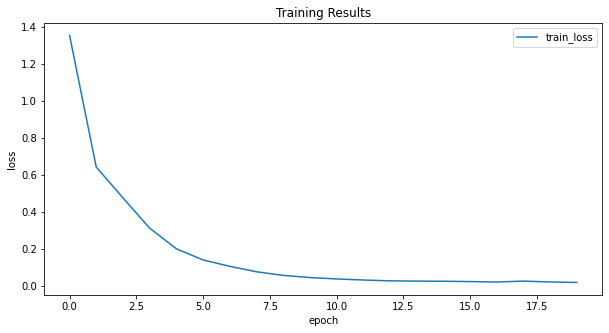

In [483]:
def plot_loss(loss):
    plt.figure(figsize=(10, 5))
    plt.plot(loss, label='train_loss')
    plt.legend()
    plt.title('Training Results')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

plot_loss(loss)

In [542]:
PATH = './Model/model_emb_att.pt'

# save
torch.save(model_emb_att.state_dict(), PATH)

'''
# load
model = Seq2Seq(encoder, decoder)   # TheModelClass(*args, **kwargs)
model.load_state_dict(torch.load(PATH))
model.eval()
'''

&#39;\n# load\nmodel = Seq2Seq(encoder, decoder)   # TheModelClass(*args, **kwargs)\nmodel.load_state_dict(torch.load(PATH))\nmodel.eval()\n&#39;

In [543]:
def predict(model, operations, max_length):
    model.eval()

    bos = torch.Tensor([[oper2ind["BOS"]]]).long().to(device)
    
    mb_x = torch.Tensor([[oper2ind.get(w, 56) for w in operations]]).long().to(device)
    mb_x_len = torch.Tensor([len(operations)]).long().to(device)
    
    pred, attention = model.predict(mb_x, mb_x_len, bos, max_length)
    pred = [ind2oper[i] for i in pred.data.cpu().numpy().reshape(-1)]

    rec = []
    for oper in pred:
        if oper != "EOS":
            rec.append(oper)
        else:
            break

    res_pred = ", ".join(rec)
    #print("pred is: ", res_pred)

    return res_pred


In [548]:
res1 = predict(model_emb_att, ['import_packages', 'load_data', 'head_overview', 'outlier'], 23)

res2 = predict(model_emb_att, ['import_packages', 'load_data', 'dataset_shape', 'drop_duplicates', 'drop_na'], 23)

res3 = predict(model_emb_att, ['load_data', 'column_name_all', 'head_overview', 'dataset_shape', 'nan_matrix', 'drop_duplicates'], 23)

res4 = predict(model_emb_att, ['load_data', 'dataset_shape', 'drop_duplicates', 'drop_na', 'scaler'], 23)

res5 = predict(model_emb_att, ['load_data', 'head_overview', 'dataset_shape', 'where_nan', 'drop_duplicates', 'heatmap', 'feature_selection'], 23)

res6 = predict(model_emb_att, ['import_packages', 'create_dataframe', 'column_name_all', 'dataset_length', 'dataset_dtype', 'head_overview', 'nan_matrix', 'drop_na', 'distribution'], 23)

res7 = predict(model_emb_att, ['where_nan', 'fill_na', 'drop_duplicates', 'plot', 'scaler', 'sampling', 'feature_selection', 'regression_model'], 23)

res8 = predict(model_emb_att, ['scaler', 'sampling', 'feature_selection'], 23)

res9 = predict(model_emb_att, ['one_hot_encoding', 'feature_selection', 'train_test_split', 'regression_model'], 23)

res10 = predict(model_emb_att, ['initial_pipeline', 'preprocessing_pipeline', 'feature_selection', 'train_test_split'], 23)

res11 = predict(model_emb_att, ['initial_pipeline', 'preprocessing_pipeline', 'feature_engineering_pipeline'], 23)

In [550]:
print('res1: ', res1, '\n\n')
print('res2: ', res2, '\n\n')
print('res3: ', res3, '\n\n')
print('res4: ', res4, '\n\n')
print('res5: ', res5, '\n\n')
print('res6: ', res6, '\n\n')
print('res7: ', res7, '\n\n')
print('res8: ', res8, '\n\n')
print('res9: ', res9, '\n\n')
print('res10: ', res10, '\n\n')
print('res11: ', res11, '\n\n')

res1:  load_data, head_overview, tail_overview 


res2:  load_data, dataset_shape, drop_duplicates, dataset_shape, drop_duplicates, dataset_shape, drop_duplicates, dataset_shape, drop_duplicates, dataset_shape, drop_duplicates, dataset_shape, drop_duplicates, dataset_shape, drop_duplicates, dataset_shape, drop_duplicates, dataset_shape, drop_duplicates, dataset_shape, drop_duplicates, dataset_shape, drop_duplicates 


res3:  nan_matrix, drop_duplicates, column_name_all, dataset_shape, nan_matrix, drop_duplicates, head_overview, tail_overview 


res4:  dataset_shape, drop_duplicates, dataset_shape, reset_index, scaler, head_overview, tail_overview 


res5:  where_nan, drop_duplicates, head_overview, tail_overview 


res6:  create_dataframe, column_name_all, dataset_length, head_overview, tail_overview 


res7:  fill_na, drop_duplicates, reset_index, feature_selection, regression_model, save_data 


res8:  sampling, feature_selection, feature_selection, feature_selection, feature_selecti

In [529]:
# This function will predict as time series forecasting
def test(model, test_input_seq, test_target_seq):
    model.eval() # eval mode
    #start = start.lower()
    # First off, run through the starting characters
    opers = [oper for oper in test_input_seq]
    size = len(opers)
    # print(size)  # here is the max length of input: 23
    res = []
    # Now pass in the previous characters and get a new one
    pred_oper = predict(model, operations, size)     # predict(model, opers[:ii+1])
    # print(opers[:ii+1])
    #if pred_oper == 'PAD_IDX':
        #   break
    return pred_oper

In [533]:
test_input_seq = test_input[2]
test_target_seq = test_target[2]
print('test_input_seq is: ', test_input_seq, '\n')
print('test_target_seq is: ', test_target_seq, '\n')

pred_str = test(model_emb_att, test_input_seq, test_target_seq)
print('pred_str is: ', pred_str, '\n')

test_input_seq is:  [&#39;scaler&#39;, &#39;correlation_matrix&#39;, &#39;unique_value_in_specific_column&#39;, &#39;group_by_column&#39;, &#39;EOS&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;] 

test_target_seq is:  [&#39;correlation_matrix&#39;, &#39;unique_value_in_specific_column&#39;, &#39;group_by_column&#39;, &#39;set_index_by_specified_column&#39;] 

pred_str is:  load_data, dataset_shape, dataset_shape, sampling, classification_model, save_data 



In [538]:
bleu_scores_1, bleu_scores_2, bleu_scores_avg = [], [], []

for i, inputs in enumerate(test_input):
    #inp = [ind2oper[j] for j in inputs]
    #label = [ind2oper[j] for j in test_target_seq[i]]
    label = test_target[i]
    pred_str = test(model_emb_att, inputs, label)
    pred_list = pred_str.split(', ')

    while 'PAD_IDX' in label:
        label.remove('PAD_IDX')
    while 'BOS' in label:
        label.remove('BOS')
    while 'EOS' in label:
        label.remove('EOS')

    while 'PAD_IDX' in pred_list:
        pred_list.remove('PAD_IDX')
    
    '''
    print('label: ', label, '\n')
    print('pred_list: ', pred_list, '\n')
    '''
    
    score_1 = sentence_bleu([label], pred_list, weights=(1, 0, 0, 0))
    score_2 = sentence_bleu([label], pred_list, weights=(0, 1, 0, 0))
    score_avg = sentence_bleu([label], pred_list, weights=(0.5, 0.5, 0, 0))

    bleu_scores_1.append(score_1)
    bleu_scores_2.append(score_2)
    bleu_scores_avg.append(score_avg)

print('BLEU score - 1-Gram: ', np.mean(bleu_scores_1))
print('BLEU score - 2-Gram: ', np.mean(bleu_scores_2))
print('BLEU score - Avg-Gram: ', np.mean(bleu_scores_avg))

BLEU score - 1-Gram:  0.046077745354477895
BLEU score - 2-Gram:  0.007144337144926169
BLEU score - Avg-Gram:  0.009223299593996698


In [540]:
from rouge import Rouge

rouge_scores_1, rouge_scores_2, rouge_scores_l, = [], [], []

for i, inputs in enumerate(test_input):
    #inp = [ind2oper[j] for j in inputs]
    #label = [ind2oper[j] for j in test_target_seq[i]]
    label = test_target[i]
    pred_str = test(model_emb_att, inputs, label)
    pred_list = pred_str.split(', ')

    while 'PAD_IDX' in label:
        label.remove('PAD_IDX')
    while 'BOS' in label:
        label.remove('BOS')
    while 'EOS' in label:
        label.remove('EOS')

    while 'PAD_IDX' in pred_list:
        pred_list.remove('PAD_IDX')

    label = ' '.join(label)
    pred_list = ' '.join(pred_list)

    rouge = Rouge()
    try:
        rouge_score = rouge.get_scores(pred_list, label)   # (pred, label)

        rouge_scores_1.append(rouge_score[0]["rouge-1"]['r'])
        rouge_scores_2.append(rouge_score[0]["rouge-2"]['r'])
        rouge_scores_l.append(rouge_score[0]["rouge-l"]['r'])
    except:
        pass


print('ROUGE-1 score: ', np.mean(rouge_scores_1))
print('ROUGE-2 score: ', np.mean(rouge_scores_2))
print('ROUGE-l score: ', np.mean(rouge_scores_l))

ROUGE-1 score:  0.13985832770109638
ROUGE-2 score:  0.01987110633727175
ROUGE-l score:  0.1395002897490735


# Transformer for Next oper recommendation

In [649]:
dict_final_emb = np.load('./Embeddings/dict_final_emb.npy', allow_pickle=True).item()

df_sentences = pd.read_csv('/Users/xinsun/Desktop/test_copy/codes/df_sentences.csv', header=0, index_col=0)

df_sentences = df_sentences.fillna('PAD_IDX')
print(len(df_sentences))

df_sentences.head()

2750


,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,import_packages,load_data,reset_index,head_overview,tail_overview,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
1,import_packages,create_dataframe,head_overview,tail_overview,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
2,import_packages,load_data,where_nan,nan_matrix,filter_by_conditions,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
3,import_packages,create_dataframe,unique_value_in_specific_column,distribution,scaler,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX
4,import_packages,load_data,index_info,reset_index,set_index_by_specified_column,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,...,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX,PAD_IDX


In [650]:
# get training dataset
df_sentences_ids = []
for i in range(len(df_sentences)):
    lists = [oper2ind[str(j)] for j in df_sentences.iloc[i] if j != 'PAD_IDX']
    #print(lists)
    df_sentences_ids.append(lists)

In [651]:
def load_data(df):
    data = []
    for i in range(len(df)):
        lists = [j for j in df.iloc[i] if j != 'PAD_IDX']
        # print(lists)
        data.append(lists)

    inputs = []
    target = []
    num_examples = 0
    maxlen = len(max(data, key=len))

    for line in data:
          inputs.append(line + ["EOS"])  # inputs.append(line[:-1] + ["EOS"])

    for line in data:
          target.append(["BOS"] + line + ["EOS"])   # target.append(["BOS"] + line[1:] + ["EOS"])
    
    return inputs, target


df_sentences = df_sentences.sample(frac=1, replace=True, random_state=1).reset_index(drop=True)
train_input, train_target = load_data(df_sentences)
#dev_text, dev_summ = load_data(test_df)

In [652]:
print(train_input[0])
print(train_target[0])

[&#39;regression_model_pipeline&#39;, &#39;save_data&#39;, &#39;EOS&#39;]
[&#39;BOS&#39;, &#39;regression_model_pipeline&#39;, &#39;save_data&#39;, &#39;EOS&#39;]


In [653]:
for i in range(len(train_input)):
    while len(train_input[i]) < maxlen:
        train_input[i].append('PAD_IDX')

for i in range(len(train_target)):
    while len(train_target[i]) < maxlen:
        train_target[i].append('PAD_IDX')

In [654]:
print(train_input[0])
print(train_target[0])

[&#39;regression_model_pipeline&#39;, &#39;save_data&#39;, &#39;EOS&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;]
[&#39;BOS&#39;, &#39;regression_model_pipeline&#39;, &#39;save_data&#39;, &#39;EOS&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;, &#39;PAD_IDX&#39;]


In [655]:
def embedding(text_sentences, summ_sentences, oper2ind, sort_by_len=True):
    '''
    Embedding the raw text sequence to digit index sequence
    '''
    length = len(text_sentences)
    out_text_sentences = [[oper2ind.get(w, 56) for w in sent] for sent in text_sentences]
    out_summ_sentences = [[oper2ind.get(w, 56) for w in sent] for sent in summ_sentences]

    print(out_text_sentences[1])
    print(out_summ_sentences[1])

    # sort sentences by english lengths
    def len_argsort(seq):
        return sorted(range(len(seq)), key=lambda x: len(seq[x]))
       
    if sort_by_len:
        sorted_index = len_argsort(out_text_sentences)
        out_text_sentences = [out_text_sentences[i] for i in sorted_index]
        out_summ_sentences = [out_summ_sentences[i] for i in sorted_index]
        
    return out_text_sentences, out_summ_sentences

inputs, target = embedding(train_input, train_target, oper2ind)

[23, 11, 12, 58, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
[57, 23, 11, 12, 58, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]


In [656]:
print(inputs[1000])
print(target[1000])

[44, 47, 58, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
[57, 44, 47, 58, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]


In [657]:
def get_minibatches(n, minibatch_size, shuffle=True):
    idx_list = np.arange(0, n, minibatch_size)
    if shuffle:
        np.random.shuffle(idx_list)
    minibatches = []
    for idx in idx_list:
        minibatches.append(np.arange(idx, min(idx + minibatch_size, n)))
    print('minibatches: ', np.shape(minibatches))
    return minibatches

def prepare_data(seqs):
    lengths = [len(seq) for seq in seqs]
    n_samples = len(seqs)
    max_len = np.max(lengths)

    x = np.zeros((n_samples, max_len)).astype('int32')
    x_lengths = np.array(lengths).astype("int32")
    for idx, seq in enumerate(seqs):
        x[idx, :lengths[idx]] = seq
    return x, x_lengths #x_mask

def gen_examples(text_sentences, summ_sentences, batch_size):
    minibatches = get_minibatches(len(text_sentences), batch_size)
    all_ex = []
    for minibatch in minibatches:
        mb_text_sentences = [text_sentences[t] for t in minibatch]
        mb_summ_sentences = [summ_sentences[t] for t in minibatch]
        mb_x, mb_x_len = prepare_data(mb_text_sentences)
        mb_y, mb_y_len = prepare_data(mb_summ_sentences)
        #all_ex.append((mb_x, mb_x_len, mb_y, mb_y_len))
        all_ex.append((mb_x, mb_y))
    print('all_ex: ', np.shape(all_ex))
    return all_ex


batch_size = 32
train_data = gen_examples(inputs, target, batch_size)

import random
random.shuffle(train_data)

minibatches:  (86,)
all_ex:  (86, 2)


In [658]:
print(np.shape(train_data))
print(np.shape(train_data[0]))
print(np.shape(train_data[0][0]))


(86, 2)
(2, 32, 23)
(32, 23)


In [659]:
dict_final_emb['load_data']

array([-1.2032438e+01, -8.5205811e-01,  7.5243747e-01,  2.7773026e-01,
       -2.7953186e+00, -6.8368518e-01,  5.6339226e+00, -8.0433428e-01,
        3.1327882e+00, -4.8203704e-01,  2.4748553e-01, -2.7924919e-01,
       -7.9214728e-01, -1.0557899e-01, -7.1348414e-02,  3.3354610e-01,
       -5.7183269e-02, -1.1588906e-01, -1.0774928e-01,  1.6190374e-01,
        5.0881721e-02, -9.4703948e-03,  4.6669852e-02,  9.0785712e-02,
        6.4181492e-02,  6.5237746e-02, -4.5316048e-02, -6.6125482e-02,
        1.1830824e-01,  3.6586106e-02,  5.3568773e-02,  3.4118585e-02,
        2.1478521e-02, -2.6222099e-02,  3.3576388e-02, -1.2859333e-01,
       -4.1393656e-02, -1.5442755e-02, -2.6926361e-02,  1.3508027e-02,
       -8.0652926e-03, -1.2352871e-02, -2.1193018e-02, -2.9715071e-03,
       -2.9919889e-02, -4.4319397e-03,  2.1111129e-02, -2.7329253e-02,
       -2.9758058e-02,  1.0761029e-02, -5.3137650e+00,  7.6123781e+00,
       -6.4233699e+00,  5.9610568e-02, -3.7983973e+00,  9.1575044e-01,
      

In [660]:
def create_embeddings(vect, idx2word, emb_size, pad_idx=55):
    emb = nn.Embedding(len(idx2word), emb_size, padding_idx=pad_idx)
    weights = emb.weight.data
    print(weights)
    for i, word in enumerate(idx2word):
        try:
            #weights[i] = torch.from_numpy(vect[word])
            #print(idx2word[i])
            #print(vect[idx2word[i]])
            weights[i] = torch.from_numpy(vect[idx2word[i]])
        except:
           pass
    emb.weight.requires_grad = True
    print(emb.weight.data.size())
    print(emb.weight.data)
    return emb

emb_vec = create_embeddings(dict_final_emb, ind2oper, 100, pad_idx=55)

tensor([[-0.8982, -0.7293, -0.4007,  ...,  0.4840, -0.1382, -1.3048],
        [ 0.3767, -2.0615,  0.3653,  ...,  0.6745,  0.5269,  1.4611],
        [-1.2843,  0.8558,  0.8206,  ...,  0.6795,  0.6386, -1.0020],
        ...,
        [ 0.2085, -0.6905, -0.4266,  ..., -0.6126, -0.3809, -0.3273],
        [-1.5905,  0.4601,  1.2440,  ..., -3.1991, -0.0823,  1.0777],
        [-0.9025,  0.4445, -0.1564,  ..., -0.3570, -0.2179, -0.0853]])
torch.Size([59, 100])
tensor([[ -7.2209,  -1.2649,  11.9355,  ...,   0.5864,   0.4105,  -0.2224],
        [-12.0324,  -0.8521,   0.7524,  ...,   0.0666,   1.2406,   0.7580],
        [ -4.0371,  -2.8929,  -0.1188,  ...,  -1.1868,   1.0977,  -0.1958],
        ...,
        [  0.2085,  -0.6905,  -0.4266,  ...,  -0.6126,  -0.3809,  -0.3273],
        [ -1.5905,   0.4601,   1.2440,  ...,  -3.1991,  -0.0823,   1.0777],
        [ -0.9025,   0.4445,  -0.1564,  ...,  -0.3570,  -0.2179,  -0.0853]])


In [661]:
emb_vec.weight.size()

torch.Size([59, 100])

In [662]:
train_data[0][0][:2]

array([[10, 17, 12, 11, 58, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55,
        55, 55, 55, 55, 55, 55, 55],
       [ 9, 25, 19, 26, 17, 11, 12, 58, 55, 55, 55, 55, 55, 55, 55, 55,
        55, 55, 55, 55, 55, 55, 55]], dtype=int32)

In [663]:
s = torch.from_numpy(train_data[0][0][0]).long()
s.size()

torch.Size([23])

In [664]:
emb_vec(s).size()

torch.Size([23, 100])

In [665]:
class PyTransformer(nn.Module):

    def __init__(self, vect, idx2word, emb_size):
        super(PyTransformer, self).__init__()
        self.embedding = create_embeddings(vect, idx2word, emb_size, pad_idx=55)  #nn.Embedding(VOCAB_SIZE, 512)
        self.transformer = nn.Transformer(100, 10, 6, 6)
        self.linear = nn.Linear(100, 59)

    def forward(self, src, tgt):
        #print('src: ', src.size())
        src_embeds = self.embedding(src)
        tgt_embeds = self.embedding(tgt)
        print('src_embeds: ', src_embeds.size())

        src_embeds = src_embeds.transpose(0,1)
        tgt_embeds = tgt_embeds.transpose(0,1)
        print('src_embeds transpose: ', src_embeds.size())
        print('tgt_embeds: ', tgt_embeds.size())

        output = self.transformer(src=src_embeds, tgt=tgt_embeds)
        output = self.linear(output)

        return output



criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0015)    #torch.optim.SGD(model.parameters(), lr=1e-3)

def train(model, data, num_epochs):
    ls = []

    for epoch in range(num_epochs):
        total_num_words = total_loss = running_loss = 0.
        model.train()
        count = 0

        for it, (mb_x, mb_y) in enumerate(data):
            '''
            mb_x = torch.from_numpy(mb_x).long().to(device)
            mb_x_lengths = torch.from_numpy(mb_x_lengths).long().to(device)
            mb_input = torch.from_numpy(mb_y[:,:-1]).long().to(device)
            mb_out = torch.from_numpy(mb_y[:, 1:]).long().to(device)
            mb_y_lengths = torch.from_numpy(mb_y_lengths-1).long().to(device)
            mb_y_lengths[mb_y_lengths <= 0] = 1
            '''
            count += 1

            mb_x = torch.from_numpy(mb_x).long().to(device)
            mb_input = torch.from_numpy(mb_y[:,:-1]).long().to(device)
            
            mb_out = torch.from_numpy(mb_y[:, 1:]).long().to(device)

            output = model(src=mb_x, tgt=mb_input)

            #print('mb_input size: ', mb_input.size())
            #print('mb_out size: ', mb_out.size())
            #print('output size: ', output.size())
            #print('\n')

            # transpose output and tgt to allow use with nn.CrossEntropyLoss
            # output_trans = output.view(-1, VOCAB_SIZE)
            # tgt_trans = tgt.view(-1, TGT_LEN * BATCH_SIZE).squeeze(0)

            output_trans = output.view(-1, VOCAB_SIZE)
            tgt_trans = mb_out.contiguous().view(-1, mb_out.size(0) * mb_out.size(1)).squeeze()
            #print('output_trans size: ', output_trans.size())
            #print('tgt_trans size: ', tgt_trans.size())

            #print('output_trans size: ', output_trans.size())
            #print('tgt_trans size: ', tgt_trans.size())
        
            loss = criterion(output_trans, tgt_trans)

            running_loss += loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        ls.append((running_loss / it).item())

        print("epoch", epoch,  "loss", (running_loss / it).item())
        print(count)

    return ls


'''
class PyTransformer(nn.Module):

    def __init__(self, vect, idx2word, emb_size):
        super(PyTransformer, self).__init__()
        self.embedding = create_embeddings(vect, idx2word, emb_size, pad_idx=55)  #nn.Embedding(VOCAB_SIZE, 512)
        self.transformer = nn.Transformer(100, 10, 6, 6)
        self.linear = nn.Linear(100, 59)

    def forward(self, src, tgt):
        #print('src: ', src.size())
        src_embeds = self.embedding(src)
        tgt_embeds = self.embedding(tgt)
        print('src_embeds: ', src_embeds.size())

        src_embeds = src_embeds.transpose(0,1)
        tgt_embeds = tgt_embeds.transpose(0,1)
        print('src_embeds transpose: ', src_embeds.size())
        print('tgt_embeds: ', tgt_embeds.size())

        output = self.transformer(src=src_embeds, tgt=tgt_embeds)
        output = self.linear(output)

        return output

'''

&quot;\nclass PyTransformer(nn.Module):\n\n    def __init__(self, vect, idx2word, emb_size):\n        super(PyTransformer, self).__init__()\n        self.embedding = create_embeddings(vect, idx2word, emb_size, pad_idx=55)  #nn.Embedding(VOCAB_SIZE, 512)\n        self.transformer = nn.Transformer(100, 10, 6, 6)\n        self.linear = nn.Linear(100, 59)\n\n    def forward(self, src, tgt):\n        #print(&#39;src: &#39;, src.size())\n        src_embeds = self.embedding(src)\n        tgt_embeds = self.embedding(tgt)\n        print(&#39;src_embeds: &#39;, src_embeds.size())\n\n        src_embeds = src_embeds.transpose(0,1)\n        tgt_embeds = tgt_embeds.transpose(0,1)\n        print(&#39;src_embeds transpose: &#39;, src_embeds.size())\n        print(&#39;tgt_embeds: &#39;, tgt_embeds.size())\n\n        output = self.transformer(src=src_embeds, tgt=tgt_embeds)\n        output = self.linear(output)\n\n        return output\n\n&quot;

In [666]:
def train(model, data, num_epochs):
    ls = []
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.0015)    #torch.optim.SGD(model.parameters(), lr=1e-3)

    for epoch in range(num_epochs):
        total_num_words = total_loss = running_loss = 0.
        model.train()

        for it, (mb_x, mb_y) in enumerate(data):
            '''
            mb_x = torch.from_numpy(mb_x).long().to(device)
            mb_x_lengths = torch.from_numpy(mb_x_lengths).long().to(device)
            mb_input = torch.from_numpy(mb_y[:,:-1]).long().to(device)
            mb_out = torch.from_numpy(mb_y[:, 1:]).long().to(device)
            mb_y_lengths = torch.from_numpy(mb_y_lengths-1).long().to(device)
            mb_y_lengths[mb_y_lengths <= 0] = 1
            '''
            
            mb_x = torch.from_numpy(mb_x).long().to(device)
            mb_input = torch.from_numpy(mb_y[:,:-1]).long().to(device)
            
            mb_out = torch.from_numpy(mb_y[:, 1:]).long().to(device)

            output = model(src=mb_x, tgt=mb_input)

            #print('mb_input size: ', mb_input.size())
            #print('mb_out size: ', mb_out.size())
            #print('output size: ', output.size())
            #print('\n')

            # transpose output and tgt to allow use with nn.CrossEntropyLoss
            # output_trans = output.view(-1, VOCAB_SIZE)
            # tgt_trans = tgt.view(-1, TGT_LEN * BATCH_SIZE).squeeze(0)

            output_trans = output.view(-1, VOCAB_SIZE)
            tgt_trans = mb_out.contiguous().view(-1, mb_out.size(0) * mb_out.size(1)).squeeze()
            #print('output_trans size: ', output_trans.size())
            #print('tgt_trans size: ', tgt_trans.size())

            #print('output_trans size: ', output_trans.size())
            #print('tgt_trans size: ', tgt_trans.size())
        
            loss = criterion(output_trans, tgt_trans)

            running_loss += loss

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
        ls.append((running_loss / it).item())

        print("epoch", epoch,  "loss", (running_loss / it).item())

    return ls
    

In [667]:
VOCAB_SIZE = 59
SRC_LEN = 23
TGT_LEN = 23
BATCH_SIZE = 32
N_EPOCHS = 3

# torch.cuda.is_available() checks and returns a Boolean True if a GPU is available, else it'll return False
is_cuda = torch.cuda.is_available()

# If we have a GPU available, we'll set our device to GPU. We'll use this device variable later in our code.
if is_cuda:
    device = torch.device("cuda")
    print("GPU is available")
else:
    device = torch.device("cpu")
    print("GPU not available, CPU used")


pytransformer = PyTransformer(vect=dict_final_emb, idx2word=ind2oper, emb_size=100) #.cuda()

loss = train(pytransformer, train_data, N_EPOCHS)

_embeds:  torch.Size([32, 23, 100])
src_embeds transpose:  torch.Size([23, 32, 100])
tgt_embeds:  torch.Size([22, 32, 100])
src_embeds:  torch.Size([32, 23, 100])
src_embeds transpose:  torch.Size([23, 32, 100])
tgt_embeds:  torch.Size([22, 32, 100])
src_embeds:  torch.Size([32, 23, 100])
src_embeds transpose:  torch.Size([23, 32, 100])
tgt_embeds:  torch.Size([22, 32, 100])
src_embeds:  torch.Size([32, 23, 100])
src_embeds transpose:  torch.Size([23, 32, 100])
tgt_embeds:  torch.Size([22, 32, 100])
src_embeds:  torch.Size([32, 23, 100])
src_embeds transpose:  torch.Size([23, 32, 100])
tgt_embeds:  torch.Size([22, 32, 100])
src_embeds:  torch.Size([32, 23, 100])
src_embeds transpose:  torch.Size([23, 32, 100])
tgt_embeds:  torch.Size([22, 32, 100])
src_embeds:  torch.Size([32, 23, 100])
src_embeds transpose:  torch.Size([23, 32, 100])
tgt_embeds:  torch.Size([22, 32, 100])
src_embeds:  torch.Size([32, 23, 100])
src_embeds transpose:  torch.Size([23, 32, 100])
tgt_embeds:  torch.Size([2

In [185]:
len(loss)

3

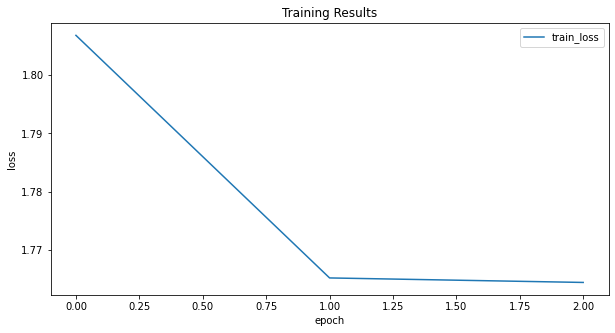

In [668]:
def plot_loss(loss):
    plt.figure(figsize=(10, 5))
    plt.plot(loss, label='train_loss')
    plt.legend()
    plt.title('Training Results')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.show()

plot_loss(loss)

In [669]:
def pred_dev(model, operations, max_length):
    model.eval()

    mb_x = torch.Tensor([[oper2ind.get(w, 0) for w in operations]]).long().to(device)
    print(mb_x.size())
    mb_out = torch.Tensor([[oper2ind["BOS"]]]).long().to(device)
    print(mb_out.size())
    
    output = model(mb_x, mb_x)  
    print(output.size())
  
    output = output.argmax(2)
    print(output.size())
    print(output)

    pred = [ind2oper[i] for i in output.data.cpu().numpy().reshape(-1)]
    rec = []
    for oper in pred:
        if oper != "EOS":
            rec.append(oper)
        else:
            break

    res_pred = ", ".join(rec)
    print("pred is: ", res_pred)

    return res_pred


operations = ['import_packages', 'load_data', 'create_dataframe', 'column_name_all', 'index_info', 'dataset_length', 'dataset_shape', 'dataset_dtype', 'extract_specific_column_by_name', 'head_overview', 'nan_matrix', 'EOS']

import time

start = time.time()
res_pred = pred_dev(pytransformer, operations, max_length=5)

end = time.time()
print(end-start)

torch.Size([1, 12])
torch.Size([1, 1])
src_embeds:  torch.Size([1, 12, 100])
src_embeds transpose:  torch.Size([12, 1, 100])
tgt_embeds:  torch.Size([12, 1, 100])
torch.Size([12, 1, 59])
torch.Size([12, 1])
tensor([[55],
        [55],
        [55],
        [55],
        [55],
        [55],
        [55],
        [55],
        [55],
        [55],
        [55],
        [55]])
pred is:  PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX, PAD_IDX
0.12919211387634277


In [670]:
def pred_dev(model, operations, max_length):
    model.eval()
    softmaxs = nn.Softmax(dim=2)
   
    mb_x = torch.Tensor([[oper2ind.get(w, 0) for w in operations]]).long().to(device)
    #print(mb_x)
    tem_res = [oper2ind["BOS"]]

    while max_length:
        print(max_length)

        mb_out = torch.Tensor([tem_res]).long().to(device)
        
        tem_res = [oper2ind["BOS"]]

        print('mb_out: ', mb_out)
        print(mb_out.size())

        output = model(mb_x, mb_out)  
        print('output size: ', output.size())  

        print(softmaxs(output))
        print(softmaxs(output).size())

        output = softmaxs(output).argmax(2)
        print('output: size', output.size()) 
        

        #pred = [ind2oper[i] for i in output.data.cpu().numpy().reshape(-1)]
        tem_res.extend(output)
        #tem_res = [output]
        max_length -= 1
        print('\n')


    pred = [ind2oper[i] for i in output.data.cpu().numpy().reshape(-1)]
    rec = []
    for oper in pred:
        if oper != "EOS":
            rec.append(oper)
        else:
            break

    res_pred = ", ".join(rec)
    print("pred is: ", res_pred)

    return res_pred

In [671]:
operations = ['import_packages', 'load_data', 'create_dataframe', 'column_name_all', 'index_info', 'dataset_length', 'dataset_shape', 'dataset_dtype', 'extract_specific_column_by_name', 'head_overview', 'nan_matrix']

res_pred = pred_dev(pytransformer, operations, max_length=5)

5
mb_out:  tensor([[57]])
torch.Size([1, 1])
src_embeds:  torch.Size([1, 11, 100])
src_embeds transpose:  torch.Size([11, 1, 100])
tgt_embeds:  torch.Size([1, 1, 100])
output size:  torch.Size([1, 1, 59])
tensor([[[1.1169e-03, 8.3562e-04, 7.1813e-04, 2.7579e-03, 1.8797e-03,
          2.2329e-03, 4.1808e-03, 2.6914e-03, 1.5880e-03, 1.0748e-02,
          6.5303e-03, 2.6717e-02, 2.5514e-02, 2.0122e-03, 5.9152e-03,
          2.3913e-03, 1.0314e-02, 8.0693e-03, 1.0085e-02, 9.7100e-03,
          5.1469e-03, 5.0963e-03, 2.0079e-03, 9.2262e-03, 4.0724e-03,
          3.4427e-03, 9.2079e-03, 2.6696e-03, 1.8671e-03, 1.5579e-03,
          2.1988e-03, 2.4552e-03, 4.4460e-03, 4.7330e-03, 6.4821e-03,
          4.6550e-03, 7.2685e-04, 1.1139e-03, 6.7778e-04, 5.1343e-04,
          5.8686e-04, 3.0792e-03, 3.9298e-03, 3.6854e-03, 2.1011e-03,
          2.5010e-03, 2.6335e-03, 5.8922e-03, 5.9674e-04, 8.5586e-04,
          6.7074e-04, 5.8615e-04, 7.7901e-04, 1.1412e-03, 5.7988e-04,
          7.2648e-01, 2.0

# Next oper rec by DeepWalk

In [56]:
operation = pd.read_csv('./df_pipe.csv', header=0, index_col=0, sep=';').dropna().reset_index(drop=True)

df_sentences = pd.read_csv('./df_flow.csv', header=0, index_col=0)


# data_operations = {'initial': ['import_packages', 'load_data', 'save_data', 'create_dataframe', 'index_info', 'column_name_all', 'dataset_length', 'dataset_shape', 'dataset_dtype', 'dataset_describe', 'extract_specific_column_by_name', 'extract_specific_row_by_index', 'head_overview', 'tail_overview', 'nan_matrix', 'where_nan', 'where_specified_element', 'unique_value_in_specific_column'],

# 'pre-processing': ['find_missing_date', 'change_to_datetime', 'sort_index', 'reset_index', 'sort_value_by_column', 'set_index_by_specified_column', 'group_by_column', 'delete_by_column_row', 'drop_na', 'fill_na', 'drop_duplicates', 'extract_duplicates', 'rename_column', 'add_new_row', 'merge_dataframe', 'concat_dataframe', 'filter_by_conditions', 'sampling', 'train_test_split', 'scaler', 'insert_new_column', 'change_specified_column_type', 'one_hot_encoding'],

# 'feature engineering': ['correlation_matrix', 'feature_selection'],                         
            
# 'visualization': ['distribution', 'heatmap', 'plot'],
                
# 'model construction': ['regression_model', 'classification_model', 'clustering_model'],

# 'module workflow': ['initial_pipeline', 'preprocessing_pipeline', 'feature_engineering_pipeline', 'regression_model_pipeline', 'classification_model_pipeline', 'outlier']}


G = nx.from_pandas_edgelist(operation, "Source", "Target", create_using=nx.DiGraph())
print(nx.is_directed(G))
len(G)

all_nodes = list(G.nodes())

oper2ind = dict()
for i, item in enumerate(all_nodes):
    oper2ind[item] = i

# print(i)

oper2ind['PAD_IDX'] = 10
oper2ind['UNK_IDX'] = 11
oper2ind['BOS'] = 12
oper2ind['EOS'] = 13


ind2oper = dict()
for i, item in enumerate(oper2ind):
    ind2oper[i] = item

True


In [57]:
df_sentences = df_sentences.fillna('PAD_IDX', inplace=False)

df_sentences.head(3)

,0,1,2,3,4
0,switch_greeting,switch_goal_setting,PAD_IDX,PAD_IDX,PAD_IDX
1,switch_greeting,switch_rating_importance,switch_self_efficacy,PAD_IDX,PAD_IDX
2,switch_greeting,switch_memory_recall,PAD_IDX,PAD_IDX,PAD_IDX


In [5]:
# get training dataset
df_sentences_ids = []
for i in range(len(df_sentences)):
    lists = [oper2ind[str(j)] for j in df_sentences.iloc[i] if j != 'PAD_IDX']
    #print(lists)
    df_sentences_ids.append(lists)

random.shuffle(df_sentences_ids)

In [6]:
maxlen = len(max(df_sentences_ids, key=len))

from sklearn.model_selection import train_test_split
train, test = train_test_split(df_sentences_ids, test_size=0.05)

print(len(train))
print(len(test))

2612
138


In [7]:
# Creating lists that will hold our input and target sequences
train_input_seq = []
train_target_seq = []
for i in range(len(train)):
    '''
    # Remove last character for input sequence
    train_input_seq.append(train[i][:-1])
    
    # Remove first character for target sequence
    train_target_seq.append(train[i][1:])
    '''
    inputs = []
    target = []
    inputs.extend(train[i][:-1])
    target.extend(train[i][1:])

    while len(inputs) < maxlen:
        inputs.append(55)

    while len(target) < maxlen:
        target.append(55)

    train_input_seq.append(inputs)
    train_target_seq.append(target)

    print("Input Sequence: {}\nTarget Sequence: {}".format(train_input_seq[i], train_target_seq[i]))


# Creating lists that will hold our input and target sequences
test_input_seq = []
test_target_seq = []
for i in range(len(test)):
    # Remove last character for input sequence
    inputs = []
    target = []
    inputs.extend(test[i][:-1])
    target.extend(test[i][1:])

    while len(inputs) < maxlen:
        inputs.append(55)

    while len(target) < maxlen:
        target.append(55)

    test_input_seq.append(inputs)
    test_target_seq.append(target)
    
    print("Input Sequence: {}\nTarget Sequence: {}".format(test_input_seq[i], test_target_seq[i]))

, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
Target Sequence: [18, 9, 19, 16, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
Input Sequence: [23, 14, 13, 29, 18, 26, 24, 33, 16, 32, 35, 10, 19, 34, 43, 45, 55, 55, 55, 55, 55, 55, 55]
Target Sequence: [14, 13, 29, 18, 26, 24, 33, 16, 32, 35, 10, 19, 34, 43, 45, 47, 55, 55, 55, 55, 55, 55, 55]
Input Sequence: [36, 25, 33, 16, 23, 26, 18, 11, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
Target Sequence: [25, 33, 16, 23, 26, 18, 11, 12, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
Input Sequence: [4, 16, 32, 11, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
Target Sequence: [16, 32, 11, 12, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
Input Sequence: [51, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55, 55]
Target Sequence: [47, 55, 55, 55, 55, 55, 55, 55, 55

In [689]:
np.shape(test_target_seq)

(138, 23)

In [8]:
dict_final_emb = np.load('./Embeddings/dict_final_emb.npy', allow_pickle=True).item()

In [9]:
def emb(oper_final_emb, all_nodes):
    stack = []
    for i, item in enumerate(all_nodes):
        tem = np.array(oper_final_emb[item])
        stack.append(tem)
    emb = np.vstack(stack)
    return emb
    

def plot_emb_sim(X, word_list):
    #X = model[word_list]
    
    # reduce dimensions to 2
    pca = PCA(n_components=2)
    result = pca.fit_transform(X)
    print(np.shape(result))
    
    plt.figure(figsize=(15,10))
    # create a scatter plot of the projection
    plt.scatter(result[:, 0], result[:, 1])

    for i, word in enumerate(word_list):
        plt.annotate(word, xy=(result[i, 0], result[i, 1]))

    plt.show()  

(55, 2)


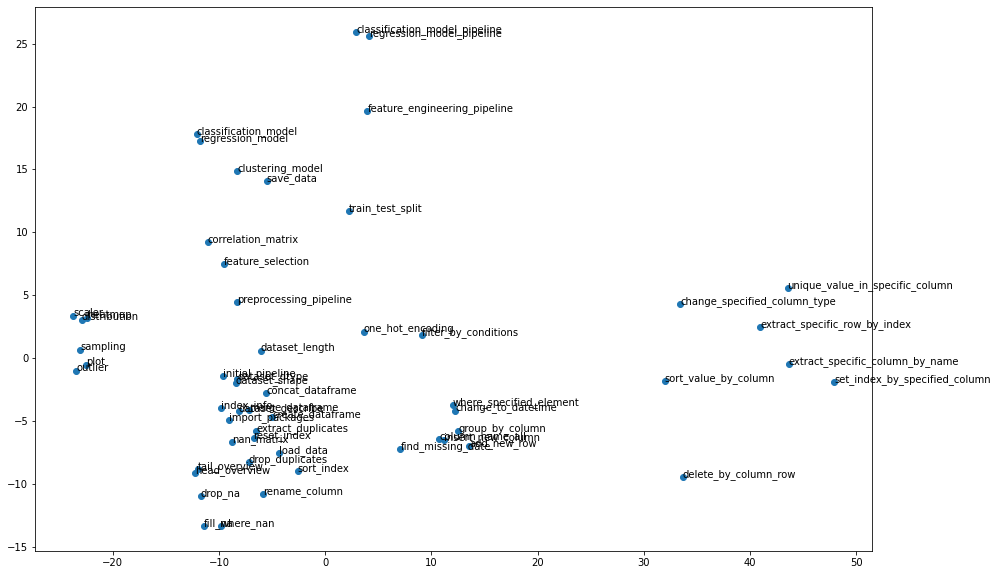

In [674]:
emb_final = emb(dict_final_emb, all_nodes)

plot_emb_sim(emb_final, all_nodes)

In [10]:
import math
#inputDict = {"in" : [0.01, -0.07, 0.09, -0.02],"and" : [0.2, 0.3, 0.5, 0.6],"to" : [0.87, 0.98, 0.54, 0.4]}

def cosine_similarity(vec1, vec2):
    sum11, sum12, sum22 = 0, 0, 0

    for i in range(len(vec1)):
        x = vec1[i] 
        y = vec2[i]
        sum11 += x*x
        sum22 += y*y
        sum12 += x*y
    return sum12/math.sqrt(sum11*sum22)


result = {}
for key, value in dict_final_emb.items():
    temp, tempDict= 0, {}
    for keyC, valueC in dict_final_emb.items():
        if keyC == key:
            continue
        temp = cosine_similarity(value,  valueC)
        tempDict[keyC] = temp

    result[key] = sorted(tempDict.items(), key=lambda d: d[1], reverse=True) 

print(result)

7785857215311), ('where_nan', 0.11108775126005994), ('create_dataframe', 0.05892921680464705), ('sort_index', 0.015697350433164683), ('train_test_split', -0.0010890043001362474), ('load_data', -0.007909042987203655), ('one_hot_encoding', -0.040247309111945496), ('classification_model_pipeline', -0.07946690202220118), ('feature_engineering_pipeline', -0.09289844010846855), ('regression_model_pipeline', -0.15915287602736944), ('group_by_column', -0.2298737623350684), ('find_missing_date', -0.23935209058909315), ('filter_by_conditions', -0.24396853411660738), ('change_to_datetime', -0.28059349864175964), ('insert_new_column', -0.33467398395896575), ('column_name_all', -0.365409406957355), ('where_specified_element', -0.39257051121914344), ('add_new_row', -0.4827385101376284), ('change_specified_column_type', -0.6214606072633402), ('delete_by_column_row', -0.6256739588403771), ('sort_value_by_column', -0.6306112071886883), ('unique_value_in_specific_column', -0.6573455934980411), ('extract

In [11]:
#np.save('./Embeddings/emb_similarity.npy', result)
emb_similarity = result

#emb_similarity = np.load('./Embeddings/emb_similarity.npy', allow_pickle=True).item()

len(emb_similarity)

55

In [12]:
import time
start = time.time()
res = emb_similarity['load_data'][:5]
end = time.time()

print('Time: ', end-start)
print(res)

Time:  0.0001709461212158203
[('create_dataframe', 0.47266523607991073), ('dataset_describe', 0.4627378677085947), ('merge_dataframe', 0.46208050915546106), ('sort_index', 0.4149905901070824), ('import_packages', 0.3813021350204549)]


In [13]:
def deepwalk_sim(sim_matrix, words, k):
    res = []
    
    for word in words:
        temp = sim_matrix[word][:k]
        res.extend([x[0] for x in temp])
    
    #print('Original res: ', res, '\n')
    #print('Non duplicate res: ', set(res), '\n')

    res = set(res) - set(words) 
    #print('Recommend: ', res, '\n')

    return list(res)

In [14]:
start = time.time()
deepwalk_sim(emb_similarity, ['distribution', 'scaler'], 3)
end = time.time()
print('Time: ', end-start)

Time:  0.00011396408081054688


In [29]:
from nltk.translate.bleu_score import sentence_bleu

bleu_scores_1, bleu_scores_2, bleu_scores_avg = [], [], []

for i, inputs in enumerate(test_input_seq):
    inp = [ind2oper[j] for j in inputs]
    label = [ind2oper[j] for j in test_target_seq[i]]

    while 'PAD_IDX' in label:
        label.remove('PAD_IDX')

    while 'PAD_IDX' in inp:
        inp.remove('PAD_IDX')

    pred_list = deepwalk_sim(emb_similarity, inp, 3)
    
    score_1 = sentence_bleu([label], pred_list, weights=(1, 0, 0, 0))
    score_2 = sentence_bleu([label], pred_list, weights=(0, 1, 0, 0))
    score_avg = sentence_bleu([label], pred_list, weights=(0.5, 0.5, 0, 0))

    '''score_1 = sentence_bleu([pred_list], label, weights=(1, 0, 0, 0))
    score_2 = sentence_bleu([pred_list], label, weights=(0, 1, 0, 0))
    score_avg = sentence_bleu([pred_list], label,  weights=(0.5, 0.5, 0, 0))'''

    '''
    print(score)
    print(label, '\n')
    print(pred_list, '\n')
    '''
    bleu_scores_1.append(score_1)
    bleu_scores_2.append(score_2)
    bleu_scores_avg.append(score_avg)


print('BLEU score - 1-Gram: ', np.mean(bleu_scores_1))
print('BLEU score - 2-Gram: ', np.mean(bleu_scores_2))
print('BLEU score - Avg-Gram: ', np.mean(bleu_scores_avg))

BLEU score - 1-Gram:  0.08474168796473205
BLEU score - 2-Gram:  1.5299641673089714e-308
BLEU score - Avg-Gram:  3.49939039073545e-155


In [26]:

reference = ['this', 'is', 'test']
candidate = [['this', 'is', 'a', 'test']]
score = sentence_bleu(candidate, reference, weights=(1, 0, 0, 0))
print(score)


0.7165313105737893


In [17]:
from rouge import Rouge

rouge_scores_1, rouge_scores_2, rouge_scores_l, = [], [], []

for i, inputs in enumerate(test_input_seq):
    inp = [ind2oper[j] for j in inputs]
    label = [ind2oper[j] for j in test_target_seq[i]]

    while 'PAD_IDX' in label:
        label.remove('PAD_IDX')

    while 'PAD_IDX' in inp:
        inp.remove('PAD_IDX')

    pred_list = deepwalk_sim(emb_similarity, inp, 3)

    label = ' '.join(label)
    pred_str = ' '.join(pred_list)

    #print('label:', label)
    #print('pred_str:', pred_str)

    rouge = Rouge()
    
    try:
        rouge_score = rouge.get_scores(pred_str, label)   # (pred, label)

        rouge_scores_1.append(rouge_score[0]["rouge-1"]['r'])
        rouge_scores_2.append(rouge_score[0]["rouge-2"]['r'])
        rouge_scores_l.append(rouge_score[0]["rouge-l"]['r'])
    except:
        pass

print('ROUGE-1 score: ', np.mean(rouge_scores_1))
print('ROUGE-2 score: ', np.mean(rouge_scores_2))
print('ROUGE-l score: ', np.mean(rouge_scores_l))

ROUGE-1 score:  0.2108303284326676
ROUGE-2 score:  0.0
ROUGE-l score:  0.2108303284326676


In [32]:
res1 = deepwalk_sim(emb_similarity, ['import_packages', 'load_data', 'head_overview', 'outlier'], 3)

res2 = deepwalk_sim(emb_similarity, ['import_packages', 'load_data', 'dataset_shape', 'drop_duplicates', 'drop_na'], 3)

res3 = deepwalk_sim(emb_similarity, ['load_data', 'column_name_all', 'head_overview', 'dataset_shape', 'nan_matrix', 'drop_duplicates'], 3)

res4 = deepwalk_sim(emb_similarity, ['load_data', 'dataset_shape', 'drop_duplicates', 'drop_na', 'scaler'], 3)

res5 = deepwalk_sim(emb_similarity, ['load_data', 'head_overview', 'dataset_shape', 'where_nan', 'drop_duplicates', 'heatmap', 'feature_selection'], 3)

res6 = deepwalk_sim(emb_similarity, ['import_packages', 'create_dataframe', 'column_name_all', 'dataset_length', 'dataset_dtype', 'head_overview', 'nan_matrix', 'drop_na', 'distribution'], 3)

res7 = deepwalk_sim(emb_similarity, ['where_nan', 'fill_na', 'drop_duplicates', 'plot', 'scaler', 'sampling', 'feature_selection', 'regression_model'], 3)

res8 = deepwalk_sim(emb_similarity, ['scaler', 'sampling', 'feature_selection'], 3)

res9 = deepwalk_sim(emb_similarity, ['one_hot_encoding', 'feature_selection', 'train_test_split', 'regression_model'], 3)

res10 = deepwalk_sim(emb_similarity, ['initial_pipeline', 'preprocessing_pipeline', 'feature_selection', 'train_test_split'], 3)

res11 = deepwalk_sim(emb_similarity, ['initial_pipeline', 'preprocessing_pipeline', 'feature_engineering_pipeline'], 3)

In [33]:
print('res1: ', res1, '\n\n')
print('res2: ', res2, '\n\n')
print('res3: ', res3, '\n\n')
print('res4: ', res4, '\n\n')
print('res5: ', res5, '\n\n')
print('res6: ', res6, '\n\n')
print('res7: ', res7, '\n\n')
print('res8: ', res8, '\n\n')
print('res9: ', res9, '\n\n')
print('res10: ', res10, '\n\n')
print('res11: ', res11, '\n\n')

res1:  ['dataset_dtype', 'heatmap', 'where_nan', 'scaler', 'create_dataframe', 'merge_dataframe', 'dataset_describe', 'plot', 'tail_overview', 'sampling'] 


res2:  ['dataset_dtype', 'where_nan', 'nan_matrix', 'dataset_length', 'create_dataframe', 'merge_dataframe', 'dataset_describe', 'fill_na', 'extract_duplicates'] 


res3:  ['dataset_dtype', 'group_by_column', 'drop_na', 'extract_specific_column_by_name', 'where_nan', 'dataset_length', 'create_dataframe', 'merge_dataframe', 'dataset_describe', 'plot', 'tail_overview', 'extract_duplicates', 'delete_by_column_row'] 


res4:  ['dataset_dtype', 'outlier', 'heatmap', 'where_nan', 'dataset_length', 'nan_matrix', 'create_dataframe', 'merge_dataframe', 'dataset_describe', 'fill_na', 'extract_duplicates', 'sampling'] 


res5:  ['dataset_dtype', 'drop_na', 'outlier', 'dataset_length', 'nan_matrix', 'scaler', 'create_dataframe', 'merge_dataframe', 'dataset_describe', 'fill_na', 'tail_overview', 'extract_duplicates', 'plot', 'sampling'] 


res

In [23]:
# instantiations
# transformer = Transformer(VOCAB_SIZE, 512, 6, 8).cuda()

# encoder params
src = torch.randint(0, VOCAB_SIZE, (SRC_LEN, BATCH_SIZE)) #.cuda()
src_pad_mask = (src != 1).view(BATCH_SIZE, SRC_LEN) #.cuda()

# decoder params
tgt = torch.randint(0, VOCAB_SIZE, (TGT_LEN, BATCH_SIZE)) #.cuda()
tgt_pad_mask = (tgt != 1).view(BATCH_SIZE, SRC_LEN) # .cuda()
tgt_mask = None #Transformer.generate_square_subsequent_mask(TGT_LEN) #.cuda()


pytransformer = PyTransformer() #.cuda()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(pytransformer.parameters(), lr=1e-3)

running_loss = 0
for epoch in range(N_EPOCHS):
    optimizer.zero_grad()
    output = pytransformer(src=src, tgt=tgt, tgt_mask=tgt_mask, src_pad_mask=src_pad_mask, tgt_pad_mask=tgt_pad_mask)

    # transpose output and tgt to allow use with nn.CrossEntropyLoss
    output_trans = output.view(-1, VOCAB_SIZE)
    tgt_trans = tgt.view(-1, TGT_LEN * BATCH_SIZE).squeeze(0)

    loss = criterion(output_trans, tgt_trans)
    running_loss += loss
    loss.backward()
    optimizer.step()
    if epoch % 10 == 0:
        print(f'Loss on epoch {epoch}: {loss}')

print('\n\nFINAL OUTPUT')
print(output.argmax(2))


Loss on epoch 0: nan


FINAL OUTPUT
tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])


In [24]:
src.size()

torch.Size([50, 100])

In [25]:
src_pad_mask.size()

torch.Size([100, 50])

In [20]:
output.argmax(2).size()

torch.Size([50, 100])